## Configure sweep on 10 MW turbine with specified shear/veer rates

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pickle
import numpy as np
import seaborn as sns
from wrf_io import *
from scipy.io import savemat
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [4]:
fontsize = 24
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 

plt.rcParams.update({
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

In [5]:
opt_params={}

opt_params['allocation']      = 'ATM170028' 
opt_params['partition']       = 'spr' 
opt_params['runtime']         = '12:00:00'
opt_params['system']          = 'stampede'
opt_params['num_nodes']       = 2
 
opt_params['exclude_time']    = 7
opt_params['save_interval']   = 10
 
opt_params['base_dir']        = '/scratch/09909/smata/wrf_les_sweep/runs/10MW/rate/train'
 
opt_params['gp_dir']          = '/scratch/09909/smata/induction_modeling/gaussian_process/10MW/train_data/'

opt_params['field_data_path'] = '/scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/'

opt_params['wrf_path']        = '/work2/09909/smata/stampede3/WRF_LES'
opt_params['template_path']   = '/scratch/09909/smata/wrf_les_sweep/templates'
opt_params['turb_model']      = 'iea10MW'
opt_params['rotor_model']     = 'GAD'
opt_params['slice_loc']       = 1
    
opt_params['print_table']     = True
    
opt_params['plot_outer']      = True
opt_params['save_outer']      = False
opt_params['outer_align']     = False
    
opt_params['plot_inner']      = True
opt_params['save_inner']      = False
    
opt_params['save_both']       = False
opt_params['outer_pad']       = 75
 
opt_params['plot_profiles']   = True
opt_params['save_profiles']   = True
 
opt_params['batch_submit']    = True
 
opt_params['prof_type']       = 'Idealized'
opt_params['shear_type']      = 'Rate'
 
# Train 
opt_params['shear']           = [-0.025,-0.015,0,0.015,0.025]
opt_params['veer']            = [-0.2,-0.13,-0.067,0,0.067,0.13,0.2]
 
opt_params['Ufst']            = 7
 
opt_params['excluded_pairs']  = []

# with open('/scratch/09909/smata/wrf_les_sweep/runs/10MW/rate/train/gad_sweep/opt_params.pkl', 'wb') as f:
#     pickle.dump(opt_params, f)

In [6]:
train_data = gpr.generate_train_data(opt_params, D=199, field_data = True)

allocation      : ATM170028
partition       : spr
runtime         : 12:00:00
system          : stampede
num_nodes       : 2
exclude_time    : 7
save_interval   : 10
base_dir        : /scratch/09909/smata/wrf_les_sweep/runs/10MW/rate/train
gp_dir          : /scratch/09909/smata/induction_modeling/gaussian_process/10MW/train_data/
field_data_path : /scratch/09909/smata/induction_modeling/gaussian_process/10MW/train_data/processedData/
wrf_path        : /work2/09909/smata/stampede3/WRF_LES
template_path   : /scratch/09909/smata/wrf_les_sweep/templates
turb_model      : iea10MW
rotor_model     : GAD
slice_loc       : 1
print_table     : True
plot_outer      : True
save_outer      : False
outer_align     : False
plot_inner      : True
save_inner      : False
save_both       : False
outer_pad       : 75
plot_profiles   : True
save_profiles   : True
batch_submit    : True
prof_type       : Idealized
shear_type      : Rate
shear           : [-0.025, -0.015, 0, 0.015, 0.025]
veer            : [

In [7]:
veer_pallette  = sns.color_palette("RdBu", as_cmap=False, n_colors=7)
shear_pallette = sns.color_palette("PRGn", as_cmap=False, n_colors=5)

In [12]:
train_data['ind_annulus'][:,17]

array([0.02595666, 0.04385448, 0.13420652, 0.29163713, 0.35265306,
       0.34133232, 0.34802678, 0.35718918, 0.35565841, 0.35468749,
       0.35228841, 0.34818487, 0.35238482, 0.36574152, 0.38199039,
       0.39697728, 0.41049829, 0.42700457, 0.44793121, 0.47066687,
       0.48300664, 0.46920522, 0.43561134, 0.39543409, 0.35321643,
       0.30787106, 0.25998179, 0.20926438, 0.15430096, 0.09612052],
      dtype=float128)

In [13]:
train_data['cotp_annulus'][:,17]

array([0.20055037, 0.16883276, 0.1983444 , 2.1467623 , 2.46969143,
       2.28185117, 2.48580076, 2.69038701, 2.60383467, 2.57903379,
       2.58771384, 2.40868598, 2.53490342, 2.76476909, 3.05422946,
       3.35909051, 3.55621562, 3.89559718, 4.35727927, 4.80473213,
       5.13444694, 4.40640328, 3.45557405, 2.62263324, 1.94996306,
       1.39605674, 0.9640738 , 0.62099893, 0.35018505, 0.14092429],
      dtype=float128)

(-0.25, 6.0)

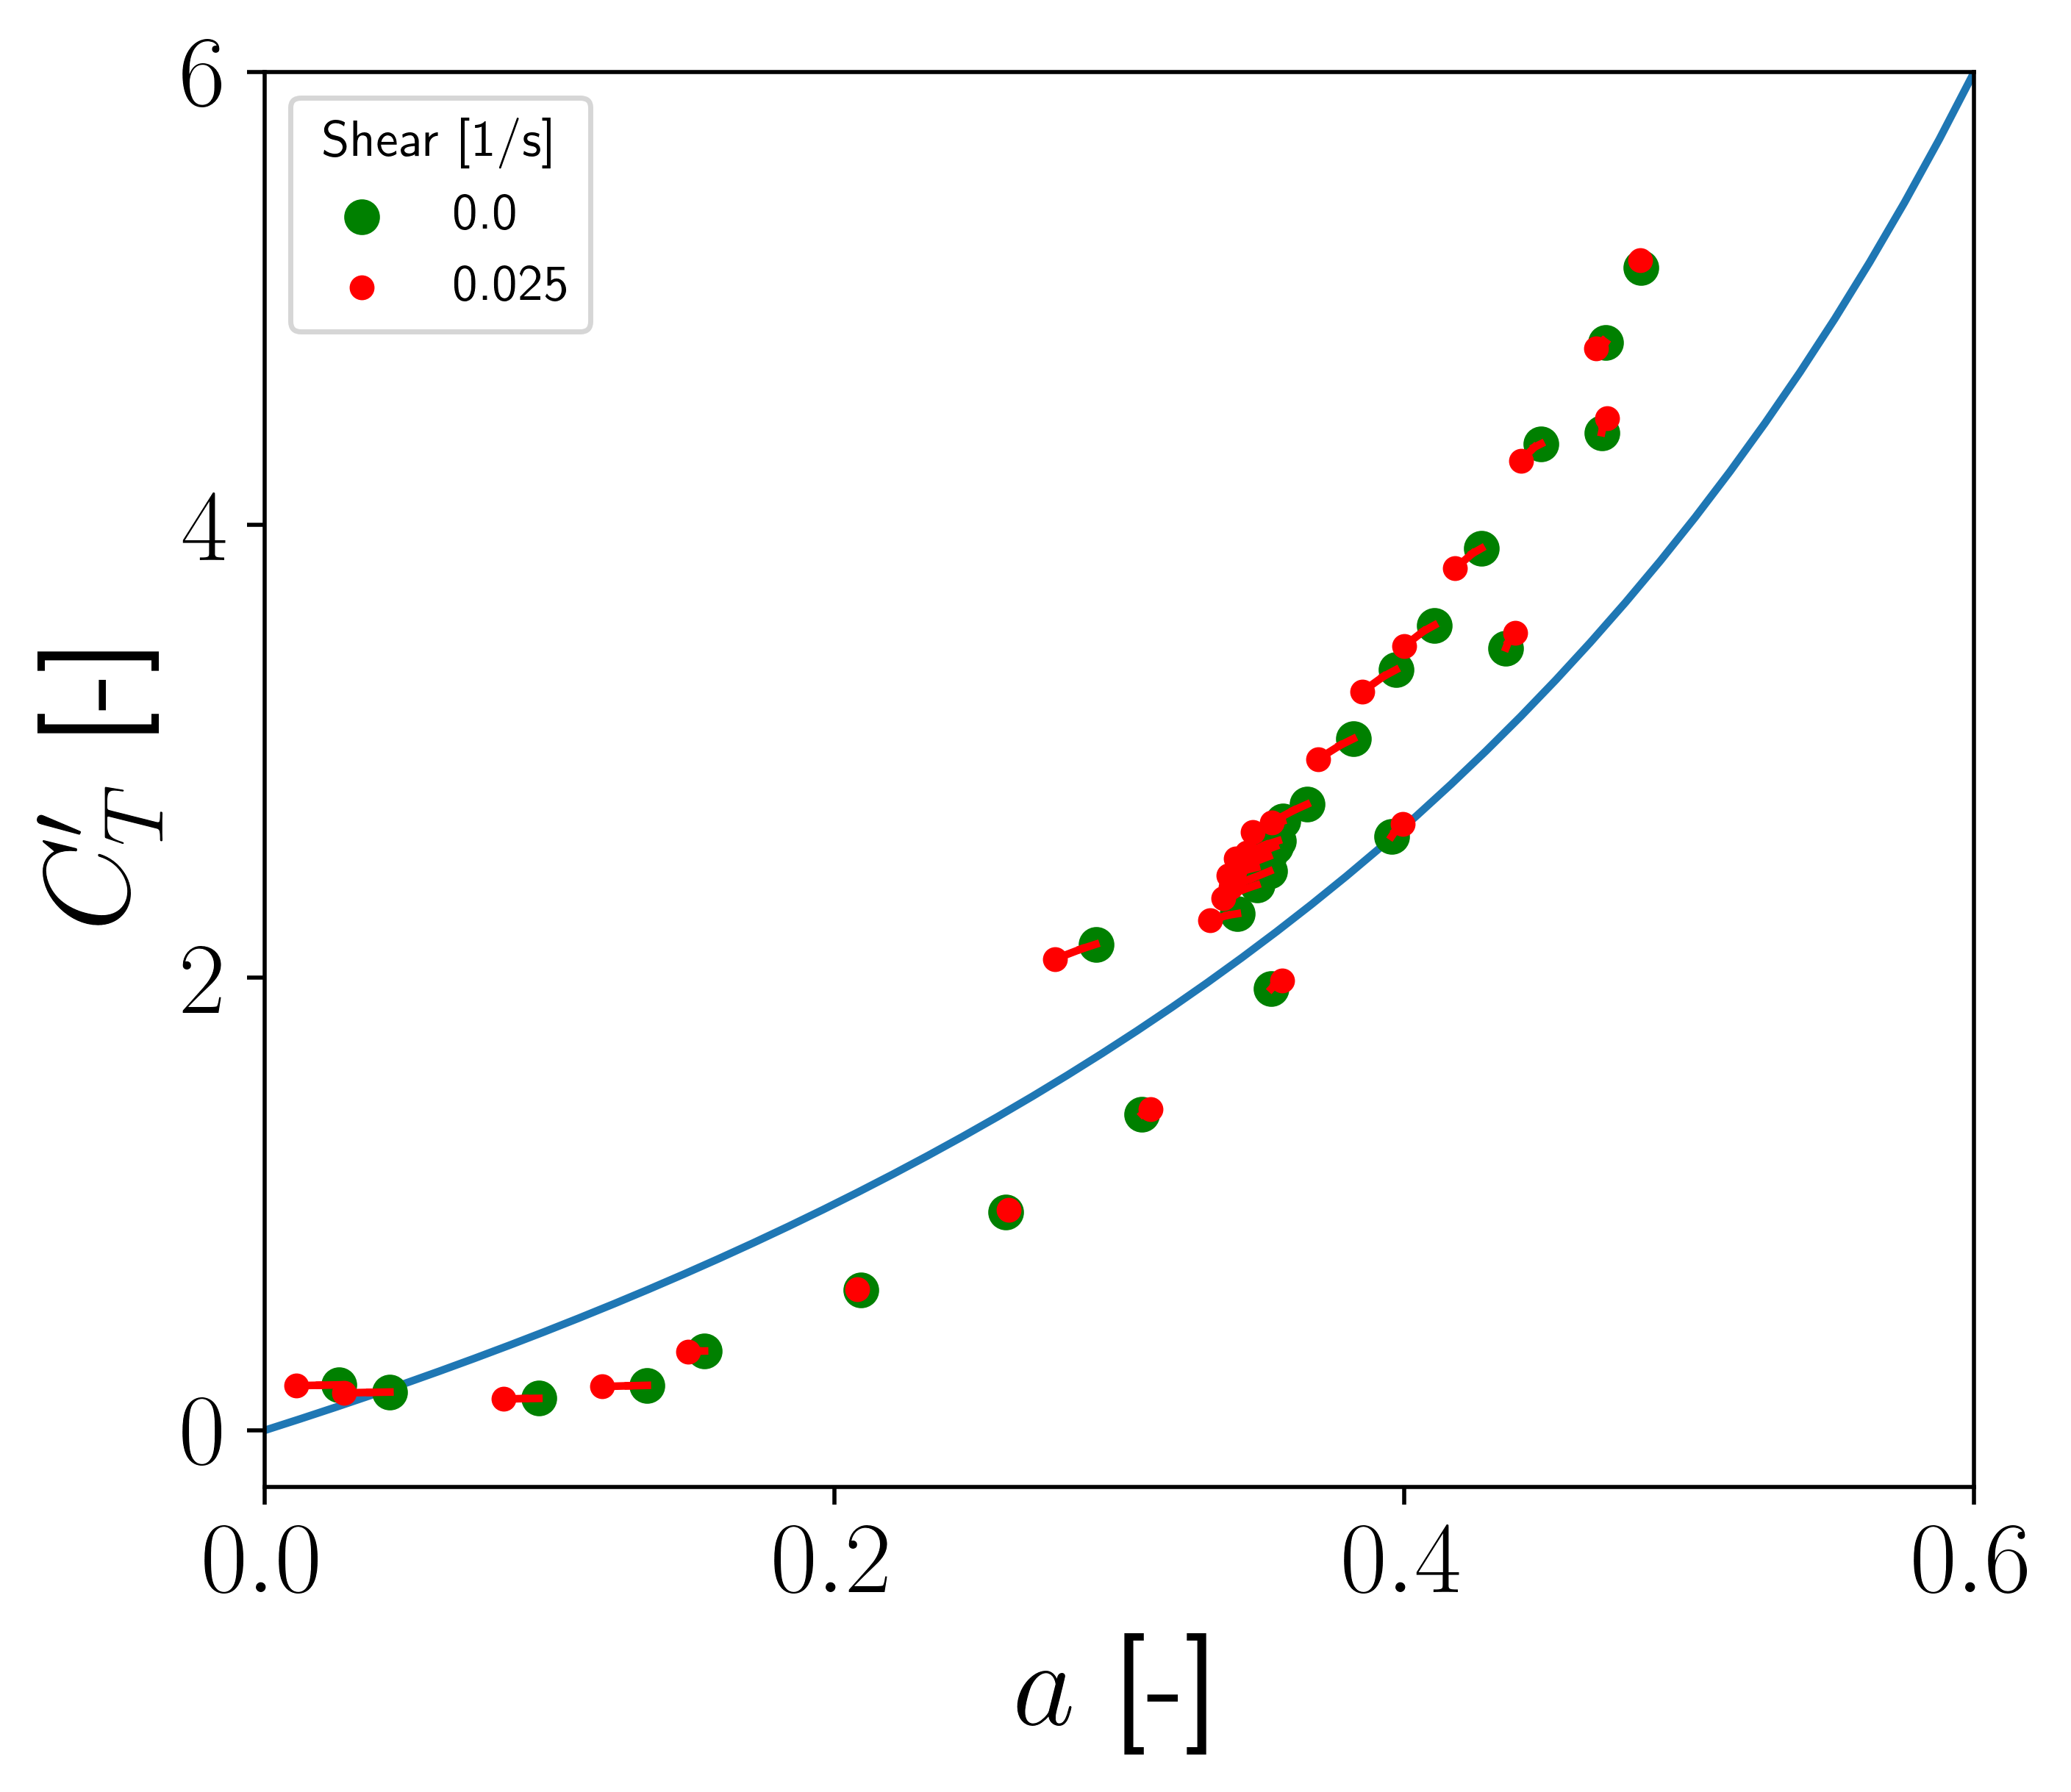

In [69]:
fig, ax = plt.subplots(figsize=(6, 5))


a = np.linspace(0,0.6,50)
# CT_formula = 4 * a * (1 - a)
CT_formula = 4 * a / (1 - a)

veer_n200 = [0,7,14,21,28]
veer_n130 = [1,8,15,22,29]
veer_n067 = [2,9,16,23,30]
veer_000  = [3,10,17,24,31]
veer_067  = [4,11,18,25,32]
veer_130  = [5,12,19,26,33]
veer_200  = [6,13,20,27,34]

uniform = 17

ax.plot(a,CT_formula,zorder=1)

# ax.scatter(train_data['ind_annulus'][:,17],  train_data['cotp_annulus'][:,17], color='green',label='0.0')

# ax.plot([train_data['ind_annulus'][:,17], train_data['ind_annulus'][:,18]],  [train_data['cotp_annulus'][:,17],train_data['cotp_annulus'][:,18]], 15,color='red')
# # ax.scatter(train_data['ind_annulus'][:,18],  train_data['cotp_annulus'][:,18], 15,color='r',label='0.067')
# ax.plot([train_data['ind_annulus'][:,18], train_data['ind_annulus'][:,19]],  [train_data['cotp_annulus'][:,18],train_data['cotp_annulus'][:,19]], 15,color='red')
# # ax.scatter(train_data['ind_annulus'][:,19],  train_data['cotp_annulus'][:,19], 15,color='r',label='0.13')
# ax.plot([train_data['ind_annulus'][:,19], train_data['ind_annulus'][:,20]],  [train_data['cotp_annulus'][:,19],train_data['cotp_annulus'][:,20]], 15,color='red')
# ax.scatter(train_data['ind_annulus'][:,20],  train_data['cotp_annulus'][:,20], 15,color='r',label='0.20')


# ax.plot([train_data['ind_annulus'][:,17], train_data['ind_annulus'][:,16]],  [train_data['cotp_annulus'][:,17],train_data['cotp_annulus'][:,16]], 15,color='red')
# # ax.scatter(train_data['ind_annulus'][:,16],  train_data['cotp_annulus'][:,16], 15,color='r',label='-0.067')
# ax.plot([train_data['ind_annulus'][:,16], train_data['ind_annulus'][:,15]],  [train_data['cotp_annulus'][:,16],train_data['cotp_annulus'][:,15]], 15,color='red')
# # ax.scatter(train_data['ind_annulus'][:,15],  train_data['cotp_annulus'][:,15], 15,color='r',label='-0.13')
# ax.plot([train_data['ind_annulus'][:,15], train_data['ind_annulus'][:,14]],  [train_data['cotp_annulus'][:,15],train_data['cotp_annulus'][:,14]], 15,color='red')
# ax.scatter(train_data['ind_annulus'][:,14],  train_data['cotp_annulus'][:,14], 15,color='r',label='-0.20')


# ax.scatter(train_data['ind_annulus'][:,17],  train_data['cot_annulus'][:,17], color='green',label='0.0')

# ax.plot([train_data['ind_annulus'][:,17], train_data['ind_annulus'][:,18]],  [train_data['cot_annulus'][:,17],train_data['cot_annulus'][:,18]], 15,color='red')
# # ax.scatter(train_data['ind_annulus'][:,18],  train_data['cot_annulus'][:,18], 15,color='r',label='0.067')
# ax.plot([train_data['ind_annulus'][:,18], train_data['ind_annulus'][:,19]],  [train_data['cot_annulus'][:,18],train_data['cot_annulus'][:,19]], 15,color='red')
# # ax.scatter(train_data['ind_annulus'][:,19],  train_data['cot_annulus'][:,19], 15,color='r',label='0.13')
# ax.plot([train_data['ind_annulus'][:,19], train_data['ind_annulus'][:,20]],  [train_data['cot_annulus'][:,19],train_data['cot_annulus'][:,20]], 15,color='red')
# ax.scatter(train_data['ind_annulus'][:,20],  train_data['cot_annulus'][:,20], 15,color='r',label='0.20')



# ax.plot([train_data['ind_annulus'][:,17], train_data['ind_annulus'][:,16]],  [train_data['cot_annulus'][:,17],train_data['cot_annulus'][:,16]], 15,color='red')
# # ax.scatter(train_data['ind_annulus'][:,16],  train_data['cot_annulus'][:,16], 15,color='r',label='-0.067')
# ax.plot([train_data['ind_annulus'][:,16], train_data['ind_annulus'][:,15]],  [train_data['cot_annulus'][:,16],train_data['cot_annulus'][:,15]], 15,color='red')
# # ax.scatter(train_data['ind_annulus'][:,15],  train_data['cot_annulus'][:,15], 15,color='r',label='-0.13')
# ax.plot([train_data['ind_annulus'][:,15], train_data['ind_annulus'][:,14]],  [train_data['cot_annulus'][:,15],train_data['cot_annulus'][:,14]], 15,color='red')
# ax.scatter(train_data['ind_annulus'][:,14],  train_data['cot_annulus'][:,14], 15,color='r',label='-0.20')


# ax.scatter(train_data['ind_annulus'][:,17],  train_data['cot_annulus'][:,17], color='green',label='0.0')

# ax.plot([train_data['ind_annulus'][:,17], train_data['ind_annulus'][:,10]],  [train_data['cot_annulus'][:,17],train_data['cot_annulus'][:,10]], 15,color='red')
# ax.scatter(train_data['ind_annulus'][:,10],  train_data['cot_annulus'][:,10], 15,color='r',label='-0.015')
# ax.plot([train_data['ind_annulus'][:,10], train_data['ind_annulus'][:,3]],  [train_data['cot_annulus'][:,10],train_data['cot_annulus'][:,3]], 15,color='red')
# ax.scatter(train_data['ind_annulus'][:,3],  train_data['cot_annulus'][:,3], 15,color='r',label='-0.025')

# ax.plot([train_data['ind_annulus'][:,17], train_data['ind_annulus'][:,24]],  [train_data['cot_annulus'][:,17],train_data['cot_annulus'][:,24]], 15,color='red')
# # ax.scatter(train_data['ind_annulus'][:,24],  train_data['cot_annulus'][:,24], 15,color='r',label='0.015')
# ax.plot([train_data['ind_annulus'][:,24], train_data['ind_annulus'][:,31]],  [train_data['cot_annulus'][:,24],train_data['cot_annulus'][:,31]], 15,color='red')
# ax.scatter(train_data['ind_annulus'][:,31],  train_data['cot_annulus'][:,31], 15,color='r',label='0.025')



ax.scatter(train_data['ind_annulus'][:,17],  train_data['cotp_annulus'][:,17], color='green',label='0.0')

# ax.plot([train_data['ind_annulus'][:,17], train_data['ind_annulus'][:,10]],  [train_data['cotp_annulus'][:,17],train_data['cotp_annulus'][:,10]], 15,color='red')
# # ax.scatter(train_data['ind_annulus'][:,10],  train_data['cotp_annulus'][:,10], 15,color='r',label='-0.015')
# ax.plot([train_data['ind_annulus'][:,10], train_data['ind_annulus'][:,3]],  [train_data['cotp_annulus'][:,10],train_data['cotp_annulus'][:,3]], 15,color='red')
# ax.scatter(train_data['ind_annulus'][:,3],  train_data['cotp_annulus'][:,3], 15,color='r',label='-0.025')

ax.plot([train_data['ind_annulus'][:,17], train_data['ind_annulus'][:,24]],  [train_data['cotp_annulus'][:,17],train_data['cotp_annulus'][:,24]], 15,color='red')
# ax.scatter(train_data['ind_annulus'][:,24],  train_data['cotp_annulus'][:,24], 15,color='r',label='0.015')
ax.plot([train_data['ind_annulus'][:,24], train_data['ind_annulus'][:,31]],  [train_data['cotp_annulus'][:,24],train_data['cotp_annulus'][:,31]], 15,color='red')
ax.scatter(train_data['ind_annulus'][:,31],  train_data['cotp_annulus'][:,31], 15,color='r',label='0.025')

ax.set_ylabel('$C_T\'$ [-]', fontsize=fontsize)
# ax.set_ylabel('$C_T$ [-]', fontsize=fontsize)
ax.set_xlabel('$a$ [-]', fontsize=fontsize)

# ax.legend(title='Veer [deg/m]')

ax.legend(title='Shear [1/s]')

ax.set_xlim([0,0.6])
ax.set_ylim([-0.25,6])


# ax.set_xlim([0,0.6])
# ax.set_ylim([0,1.5])


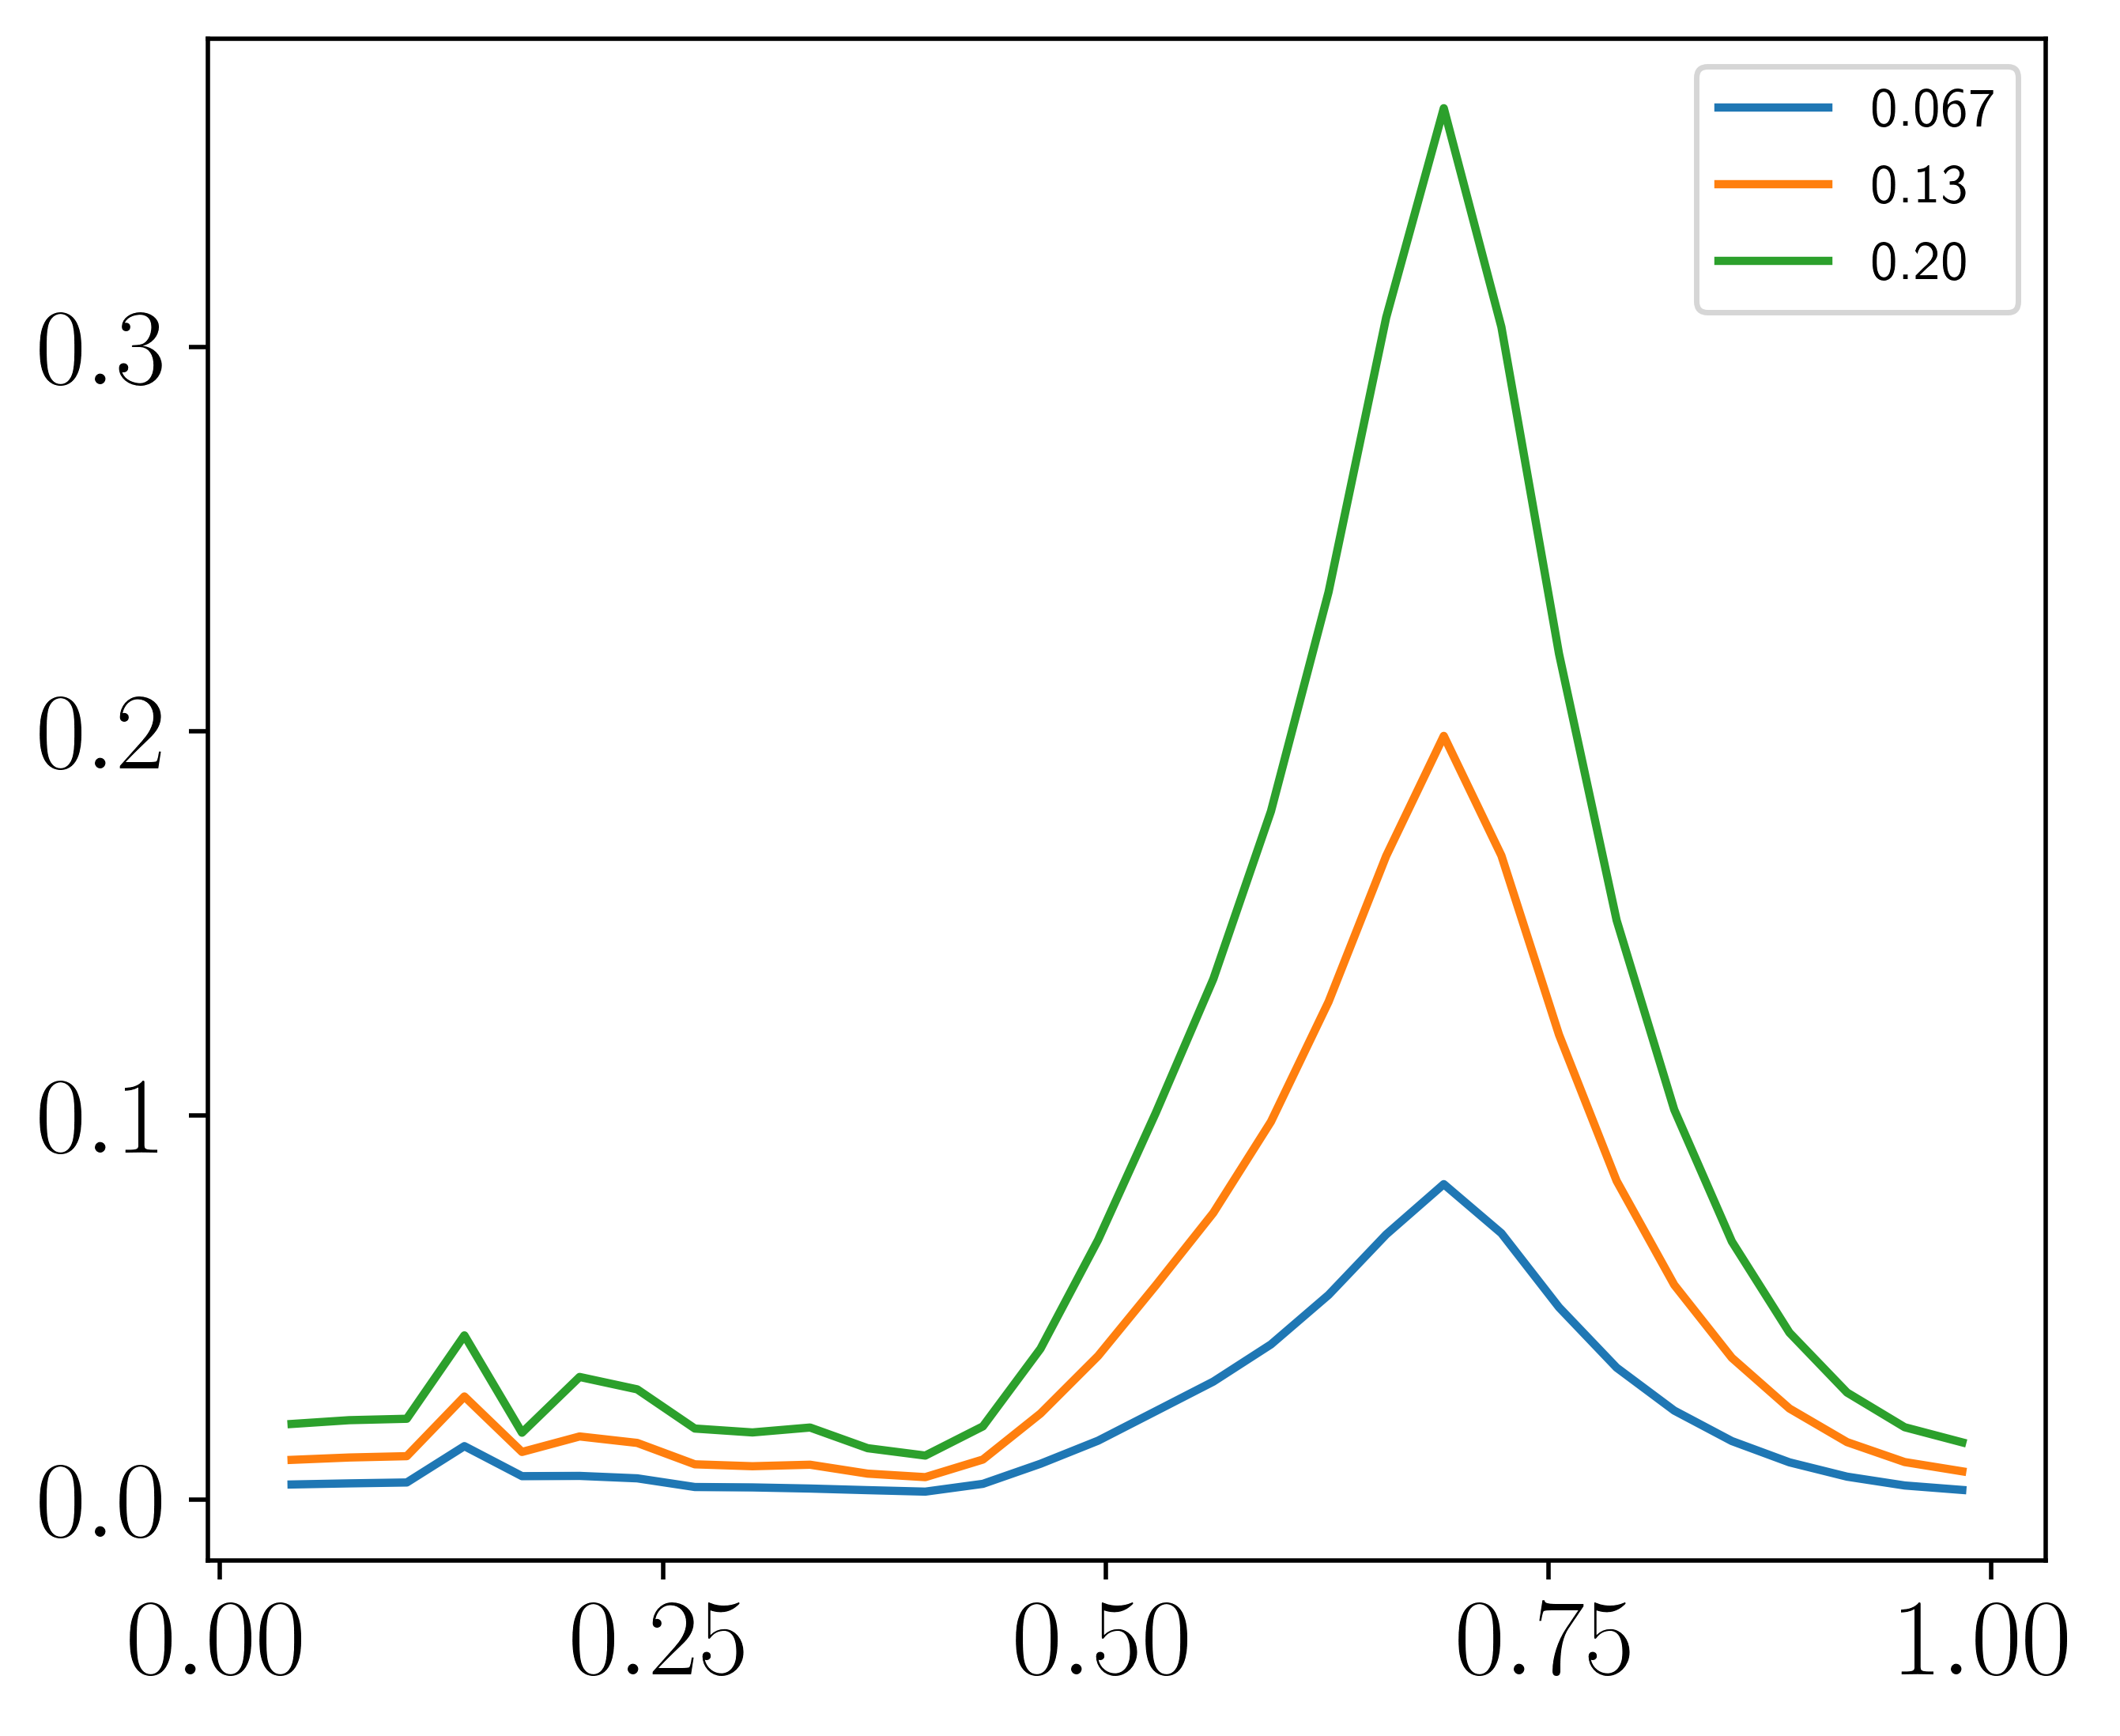

In [ ]:
from MITRotor import IEA10MW, BEMGeometry

rotor = IEA10MW()
geom = BEMGeometry(Nr = 30, Ntheta=160, R=rotor.R, Rhub=rotor.hub_radius)

veer_067 = ((train_data['ind_annulus'][:,17] - train_data['ind_annulus'][:,18])**2 + (train_data['cotp_annulus'][:,17] - train_data['cotp_annulus'][:,18])**2)**(1/2)
veer_130 = ((train_data['ind_annulus'][:,17] - train_data['ind_annulus'][:,19])**2 + (train_data['cotp_annulus'][:,17] - train_data['cotp_annulus'][:,19])**2)**(1/2)
veer_200 = ((train_data['ind_annulus'][:,17] - train_data['ind_annulus'][:,20])**2 + (train_data['cotp_annulus'][:,17] - train_data['cotp_annulus'][:,20])**2)**(1/2)

fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(geom.mu, veer_067, label='0.067')
ax.plot(geom.mu, veer_130, label='0.130')
ax.plot(geom.mu, veer_200, label='0.200')

ax.legend()

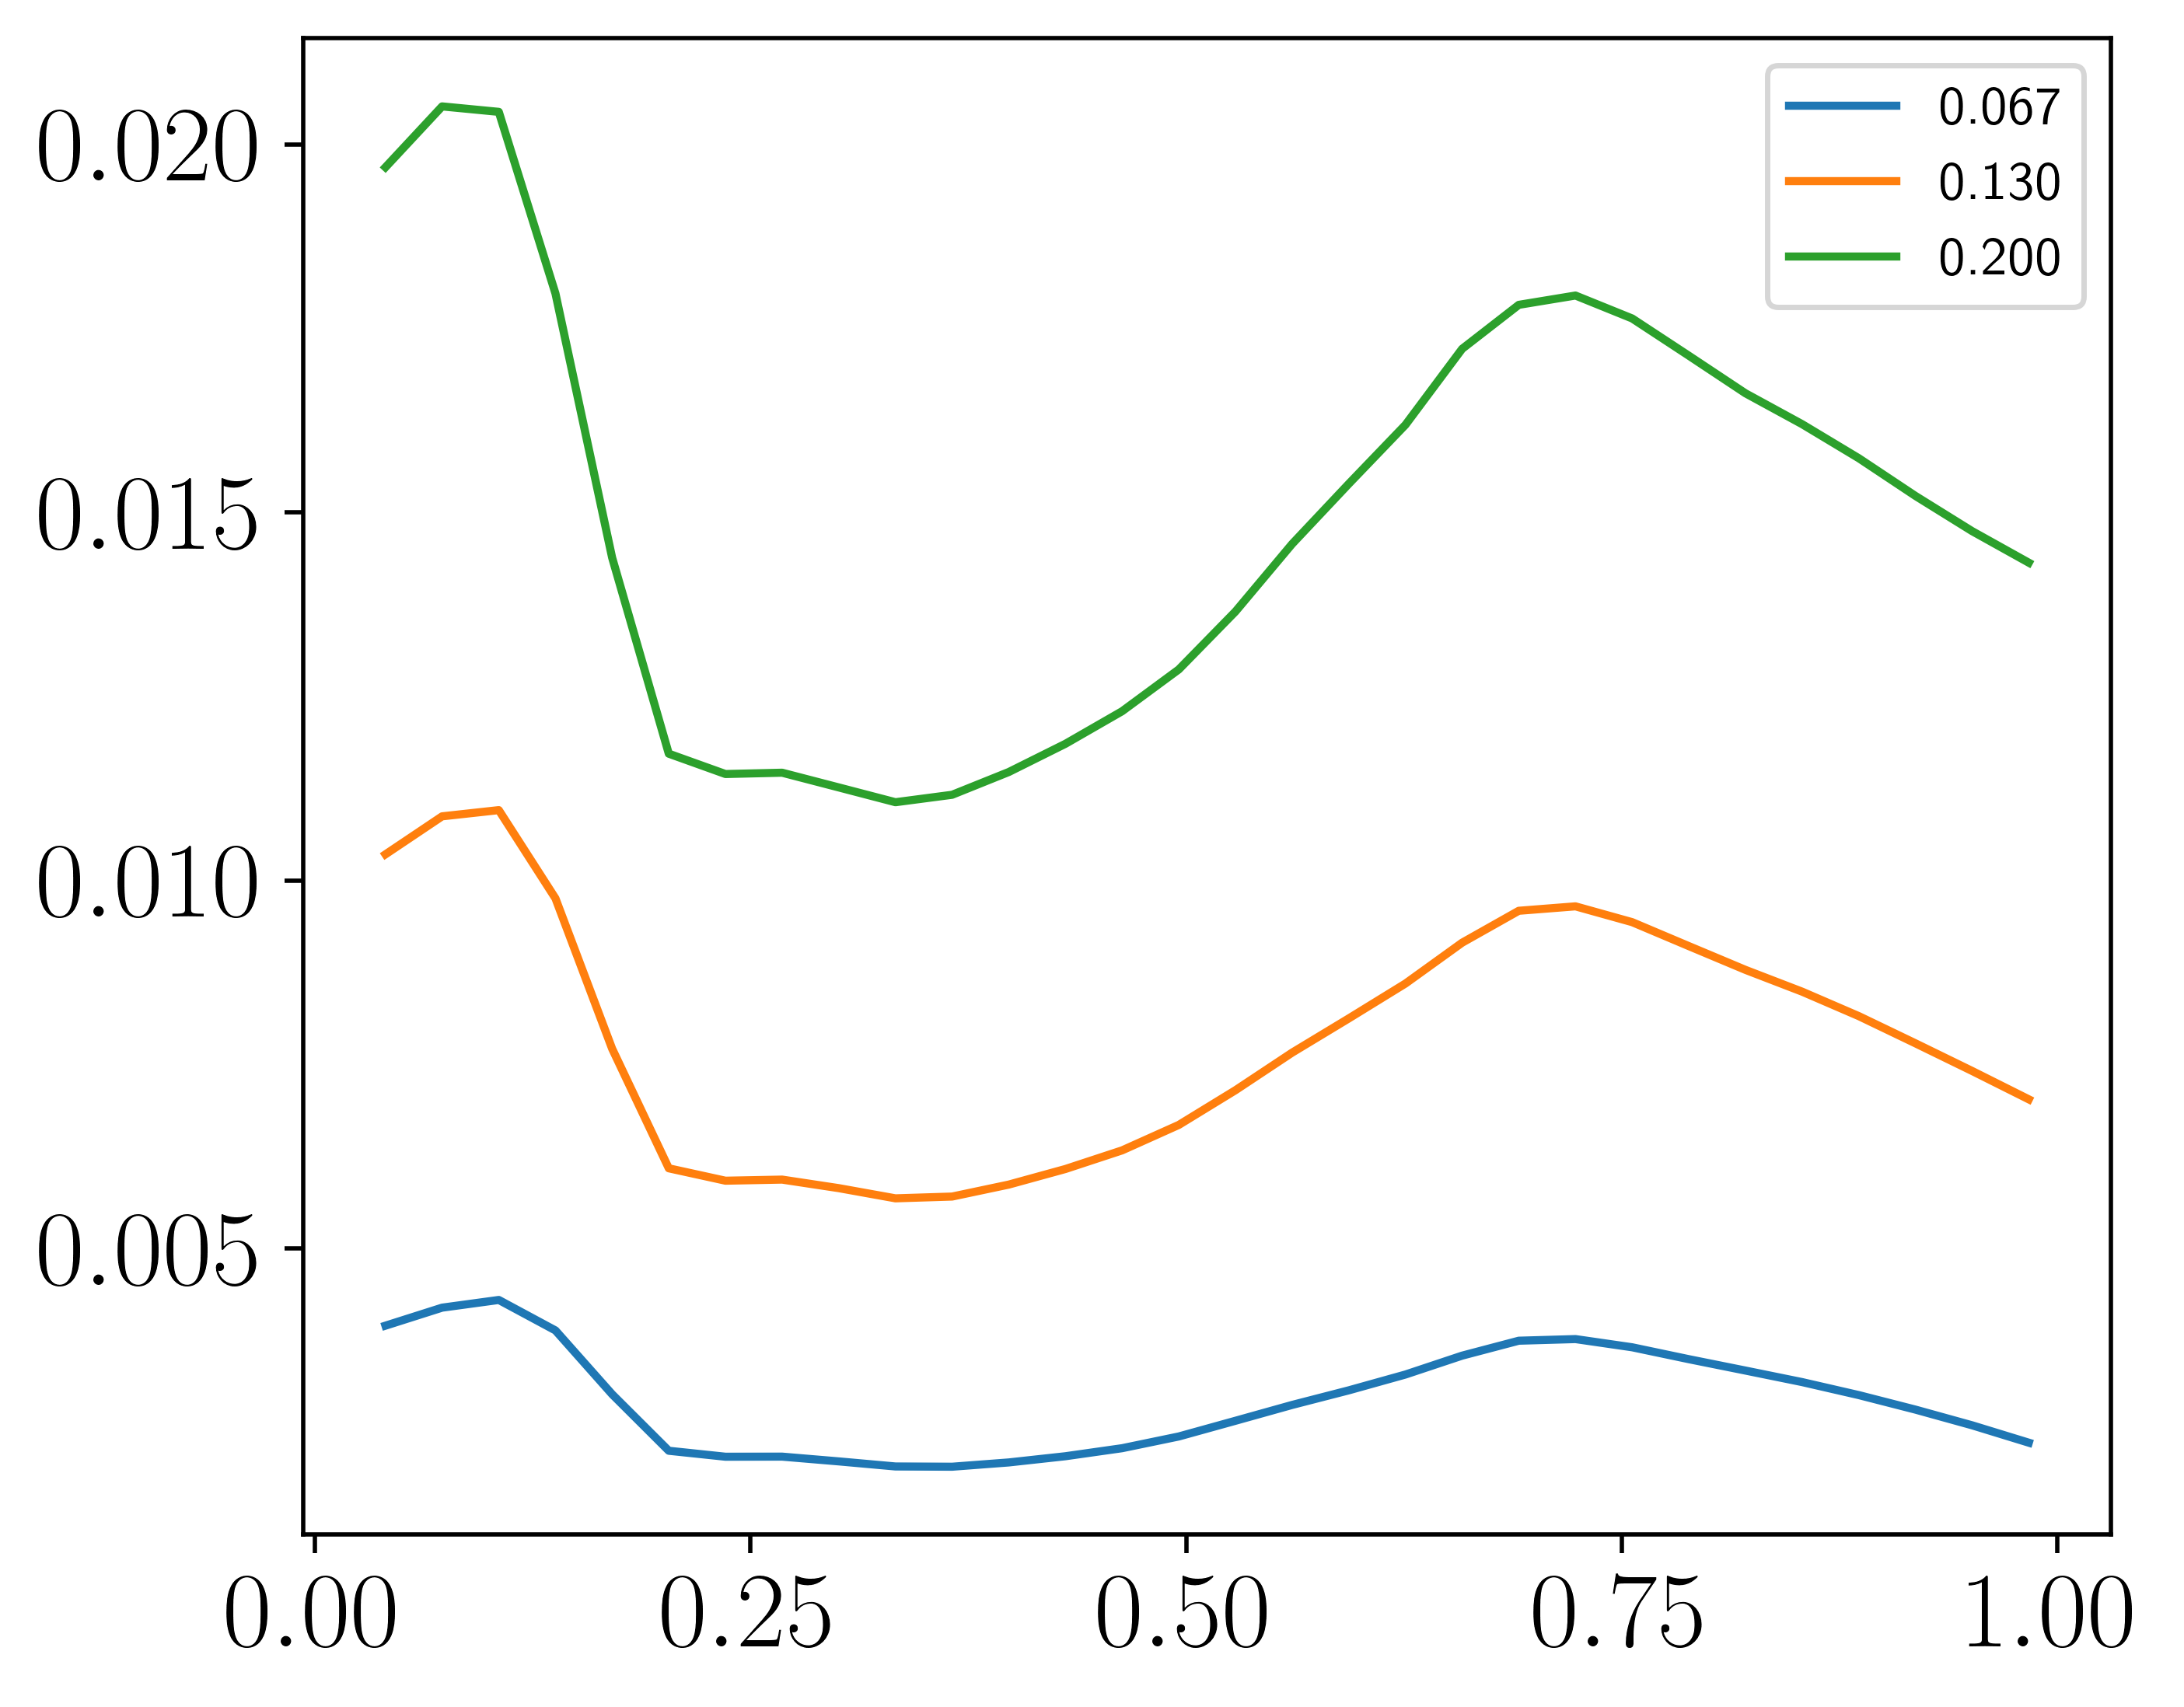

In [22]:
from MITRotor import IEA10MW, BEMGeometry

rotor = IEA10MW()
geom = BEMGeometry(Nr = 30, Ntheta=160, R=rotor.R, Rhub=rotor.hub_radius)

veer_067 = train_data['ind_annulus'][:,18] - train_data['ind_annulus'][:,17]
veer_130 = train_data['ind_annulus'][:,19] - train_data['ind_annulus'][:,17]
veer_200 = train_data['ind_annulus'][:,20] - train_data['ind_annulus'][:,17]

fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(geom.mu, veer_067, label='0.067')
ax.plot(geom.mu, veer_130, label='0.130')
ax.plot(geom.mu, veer_200, label='0.200')

# ax.plot(geom.mu, veer_067/max(veer_067), label='0.067')
# ax.plot(geom.mu, veer_130/max(veer_130), label='0.130')
# ax.plot(geom.mu, veer_200/max(veer_200), label='0.200')

# ax.set_ylim([0,0.025])

ax.legend()

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares, minimize
from scipy.interpolate import interp1d

rotor = IEA10MW()
geom = BEMGeometry(Nr = 30, Ntheta=160, R=rotor.R, Rhub=rotor.hub_radius)

veer_067 = train_data['ind_annulus'][:,18] - train_data['ind_annulus'][:,17]
veer_130 = train_data['ind_annulus'][:,19] - train_data['ind_annulus'][:,17]
veer_200 = train_data['ind_annulus'][:,20] - train_data['ind_annulus'][:,17]

Model 1: vertical scaling only (y ≈ b(s) F(x))
s=0.067  b=1  ratio CV=0.0000  NRMSE=0.0000
s=0.130  b=2.64508  ratio CV=0.0397  NRMSE=0.0568
s=0.200  b=5.02716  ratio CV=0.0622  NRMSE=0.0949

Model 2: vertical affine (y ≈ a(s) + b(s) F(x))
s=0.067  a=0.0000e+00  b=1  NRMSE=0.0000
s=0.130  a=1.0769e-03  b=2.29956  NRMSE=0.0316
s=0.200  a=3.1249e-03  b=4.02456  NRMSE=0.0562

Model 3: affine in x and y (y ≈ a + b F(c x + d))
s=0.067  a=0.0000e+00  b=1  c=1  d=0  NRMSE=0.0000
s=0.130  a=1.0263e-03  b=2.31481  c=0.97393  d=0.00950726  NRMSE=0.0170
s=0.200  a=2.9300e-03  b=4.08529  c=0.953065  d=0.0163817  NRMSE=0.0314

Model 4: similarity collapse y = s^alpha F(x/s^beta)
Estimated exponents: alpha=-230.759, beta=115.302, objective=0.000e+00


/tmp/ipykernel_701188/1627178777.py:89: RuntimeWarning: overflow encountered in scalar power
  ys_list.append(Y[j] / (s[j] ** alpha))


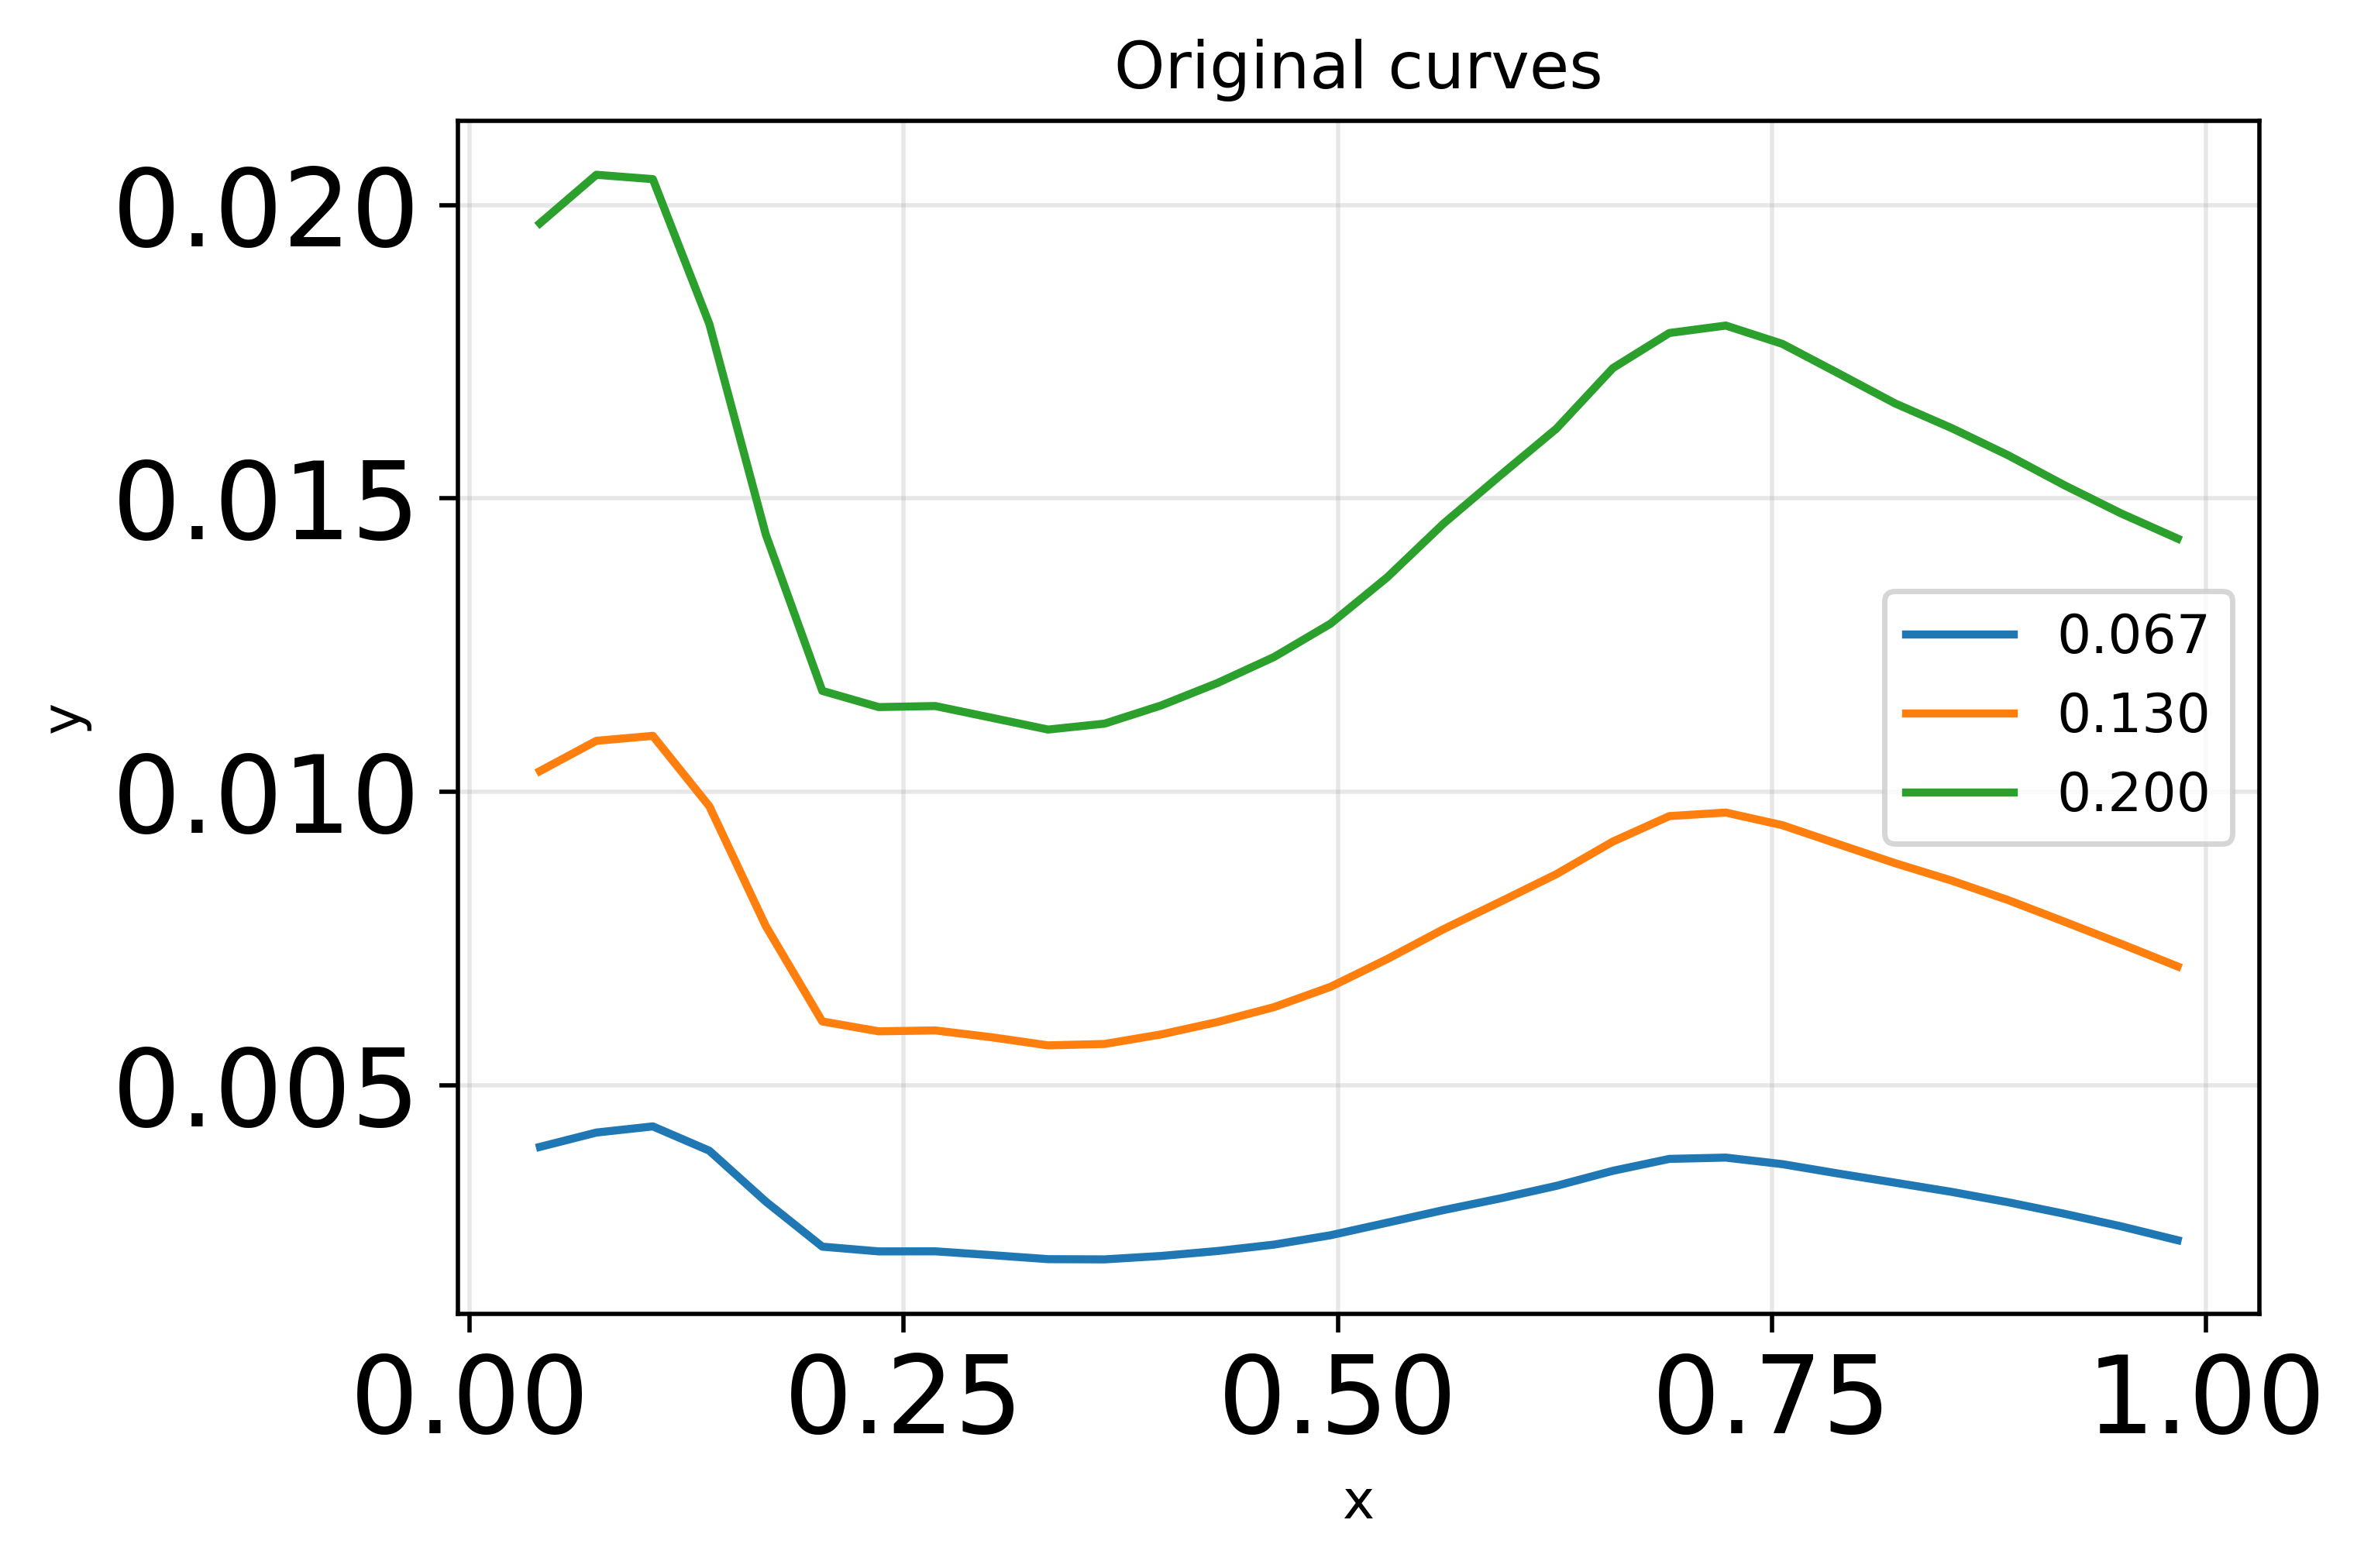

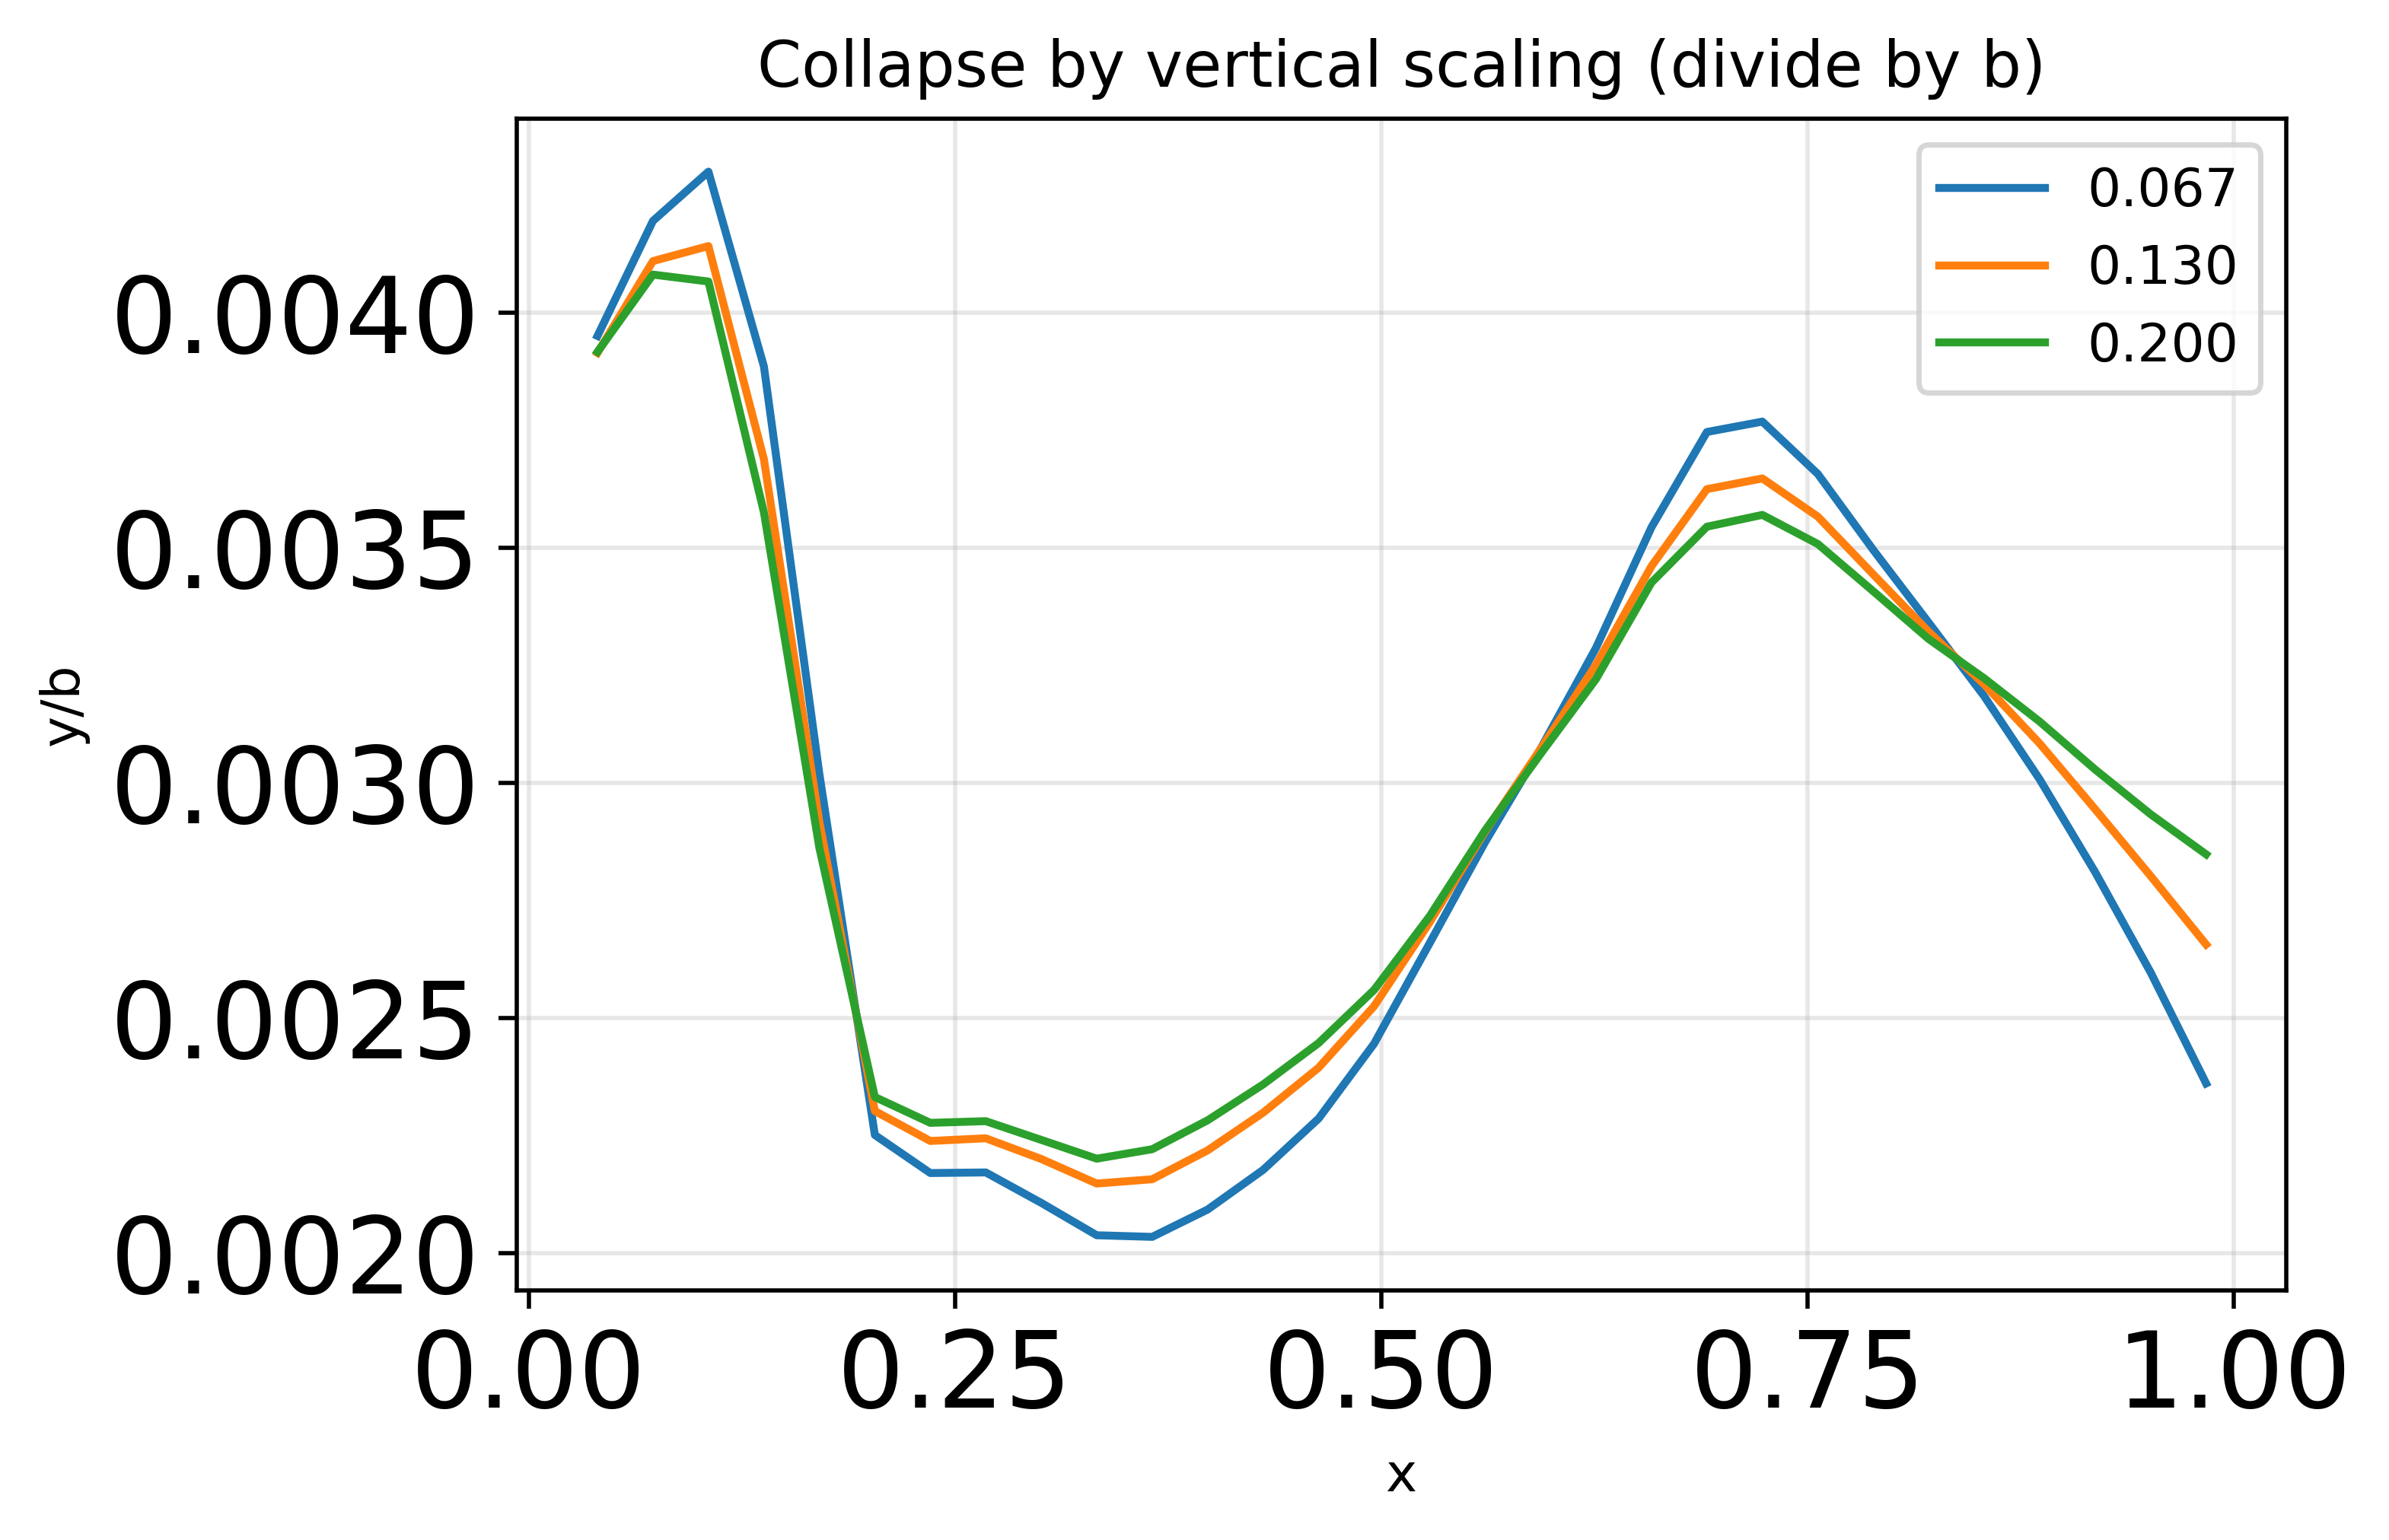

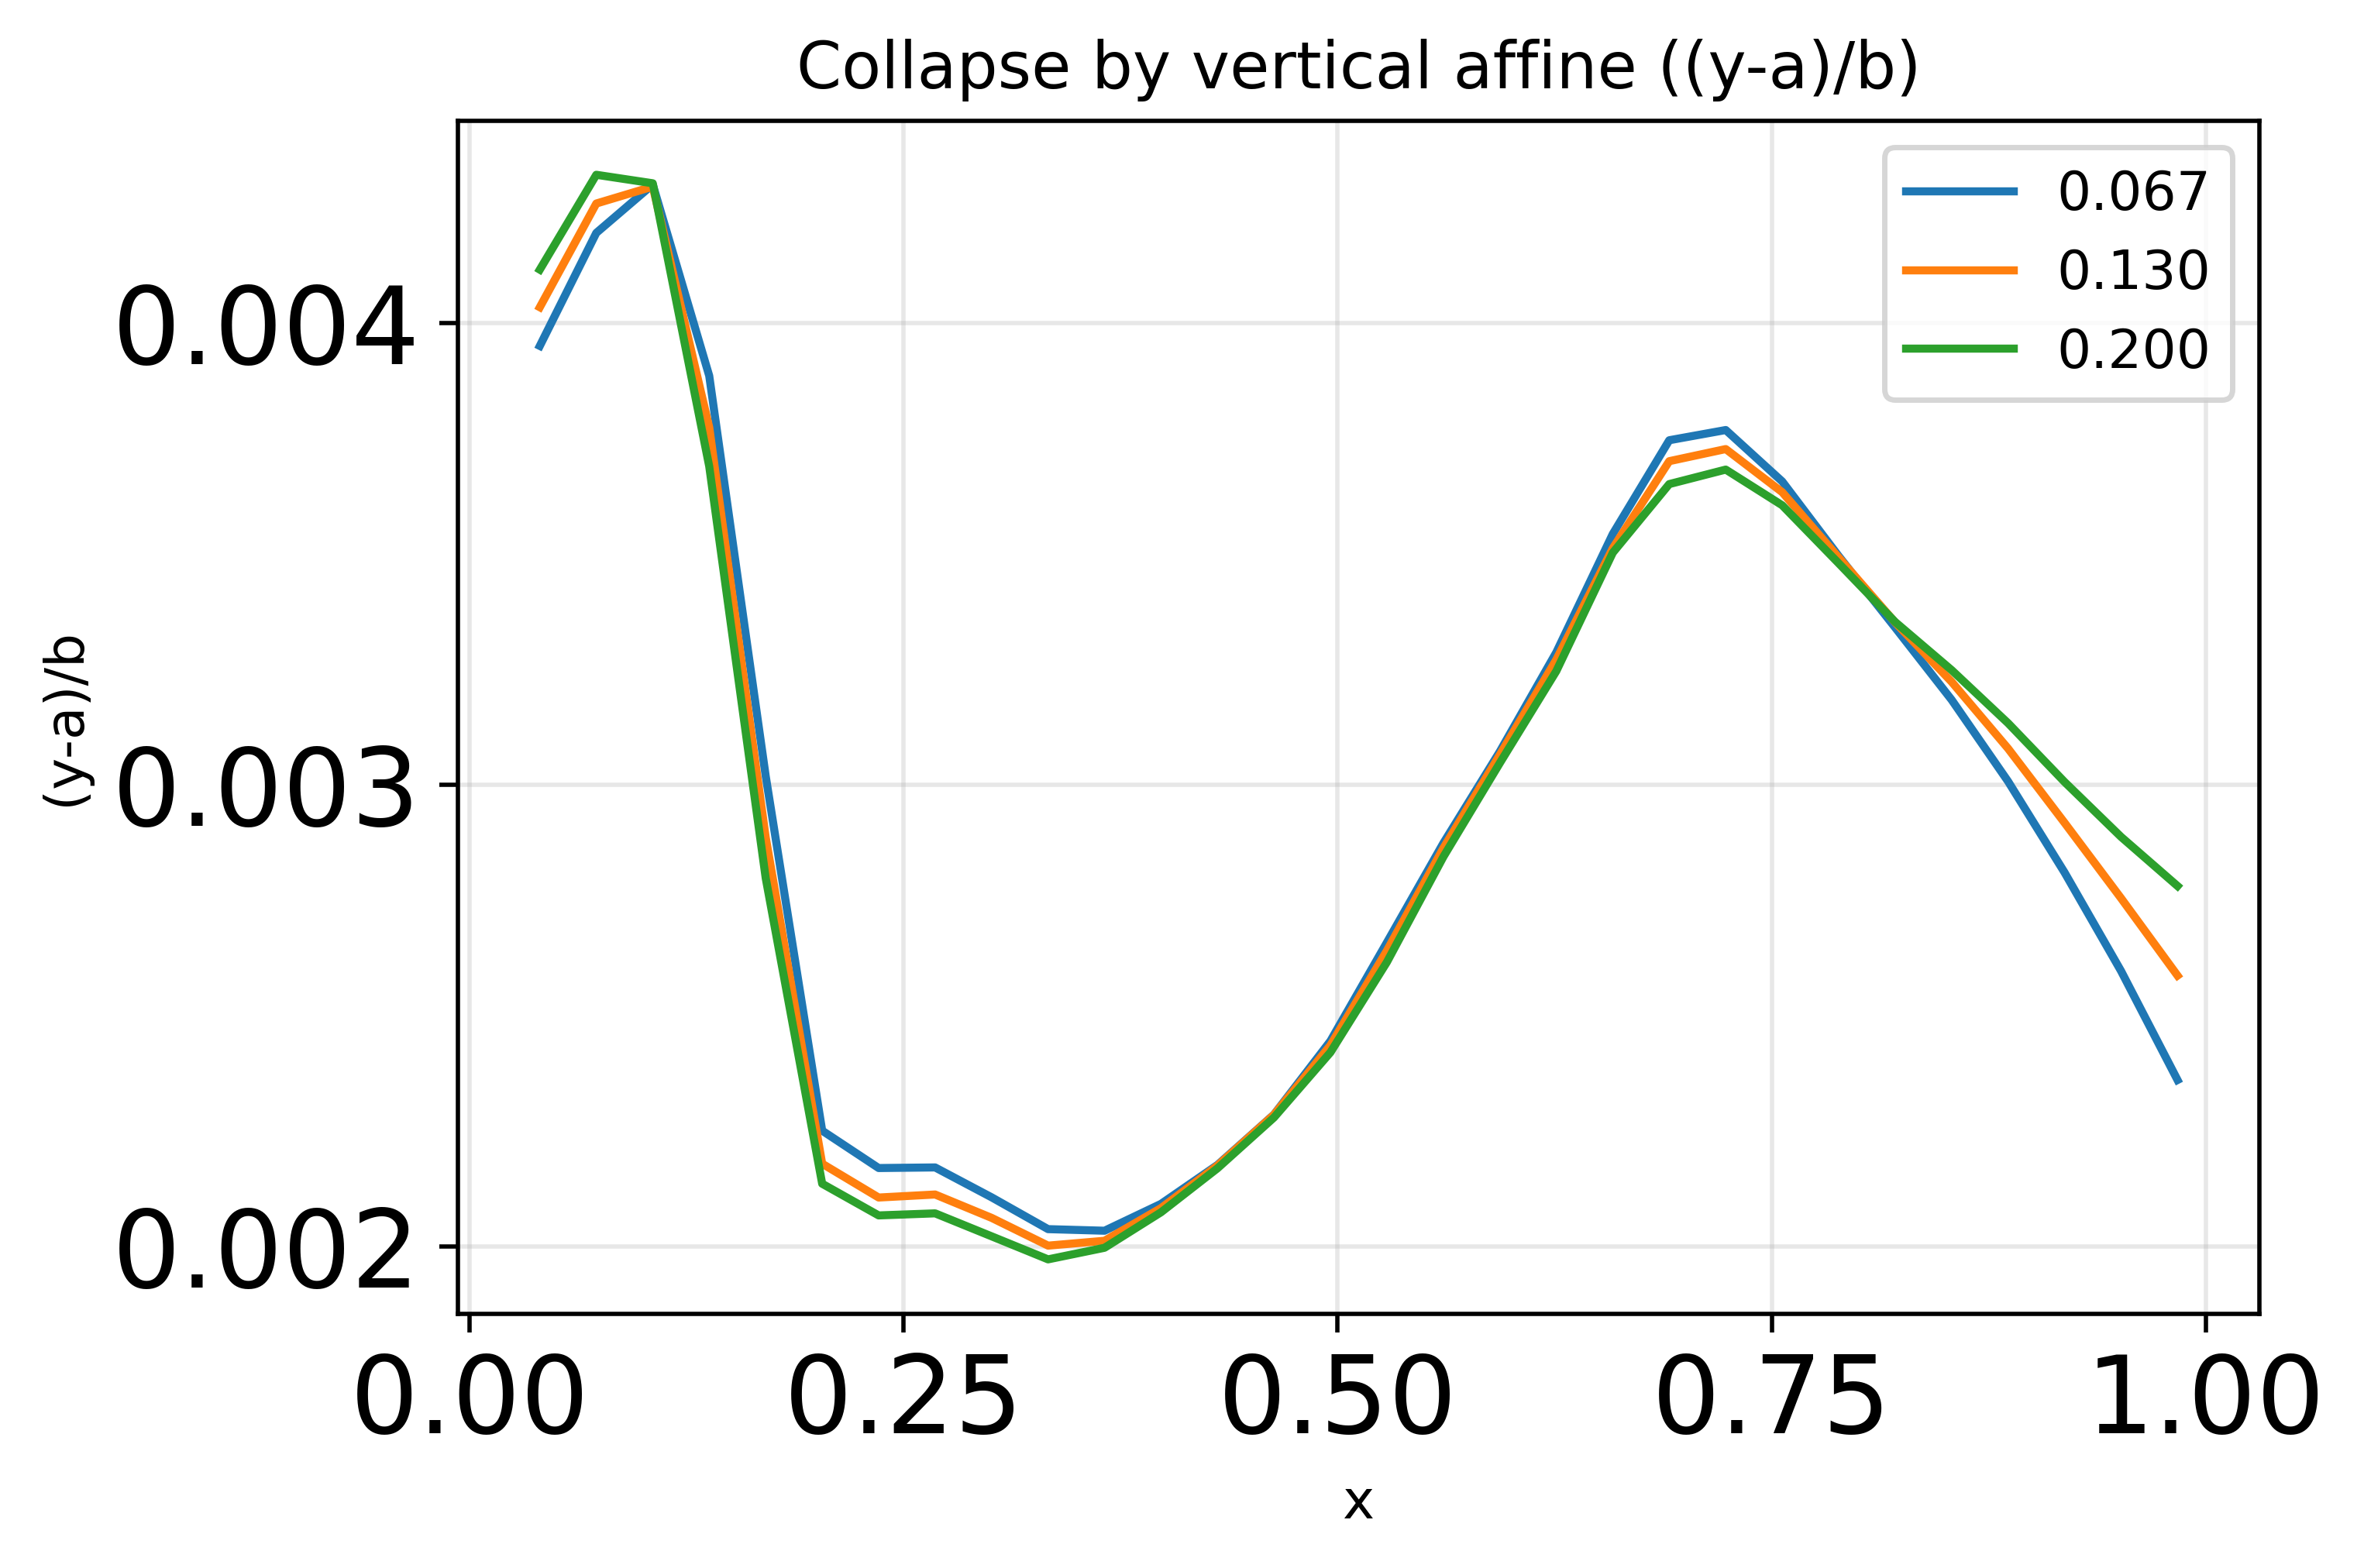

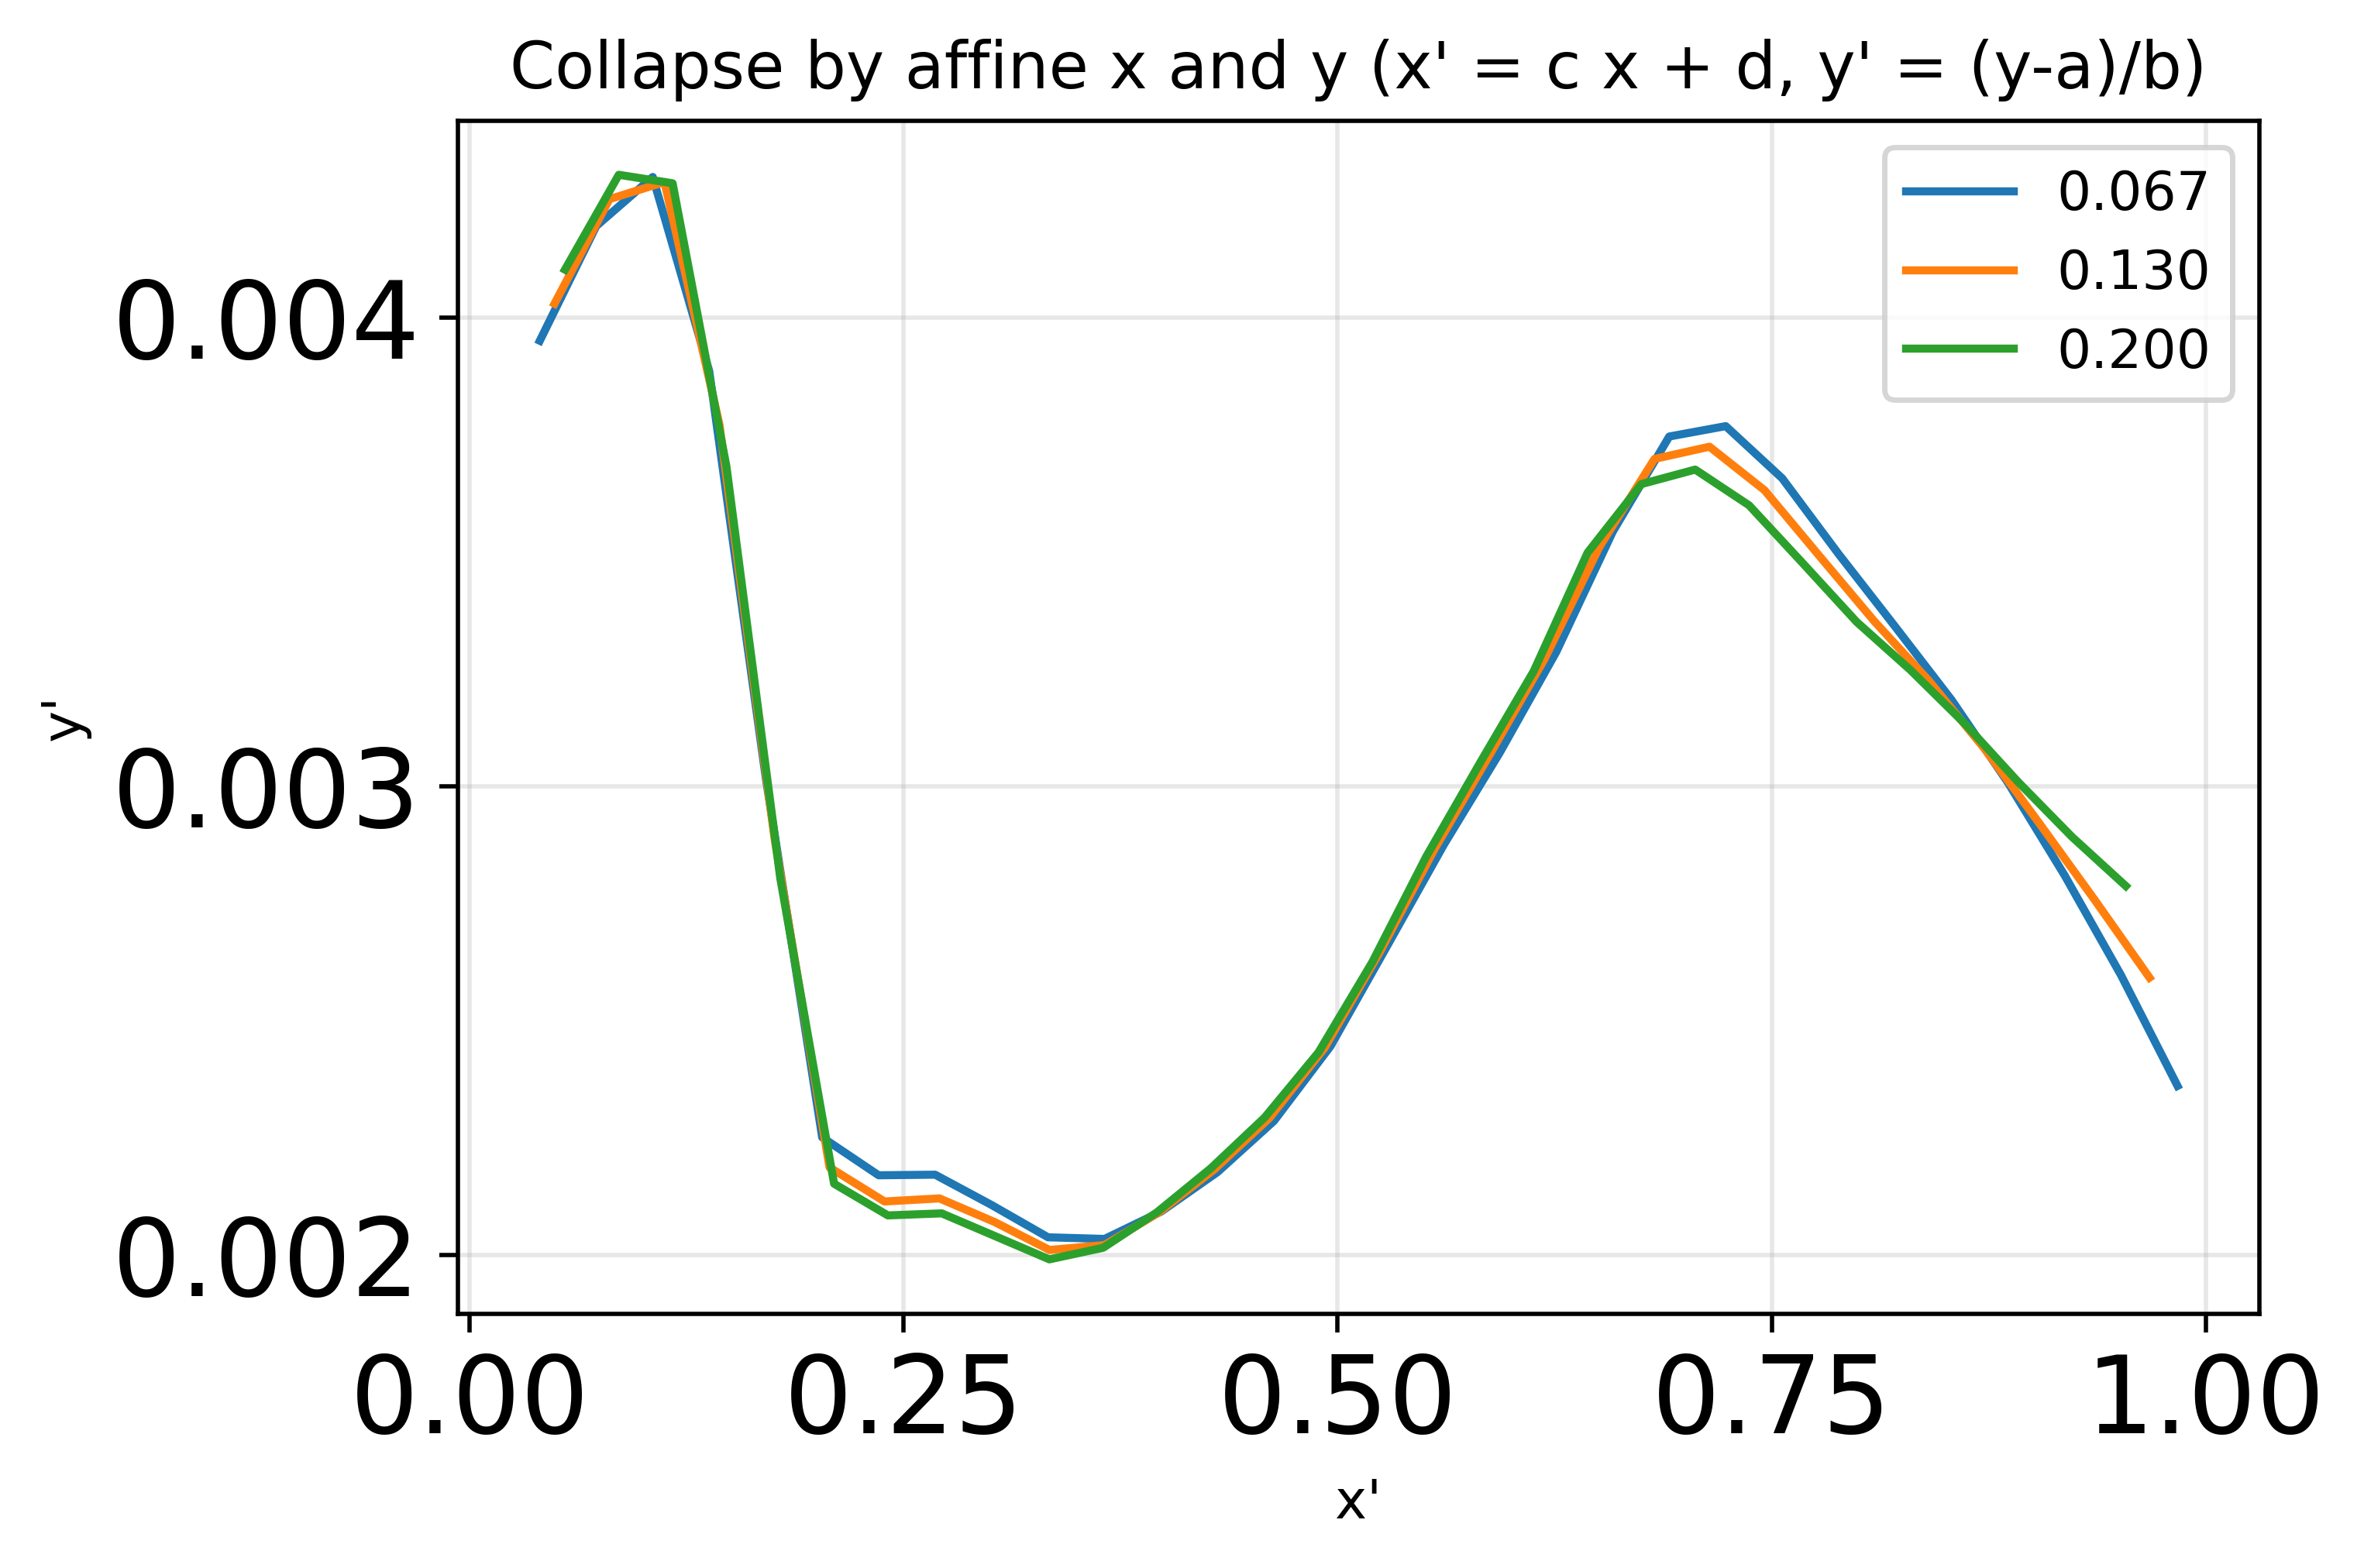

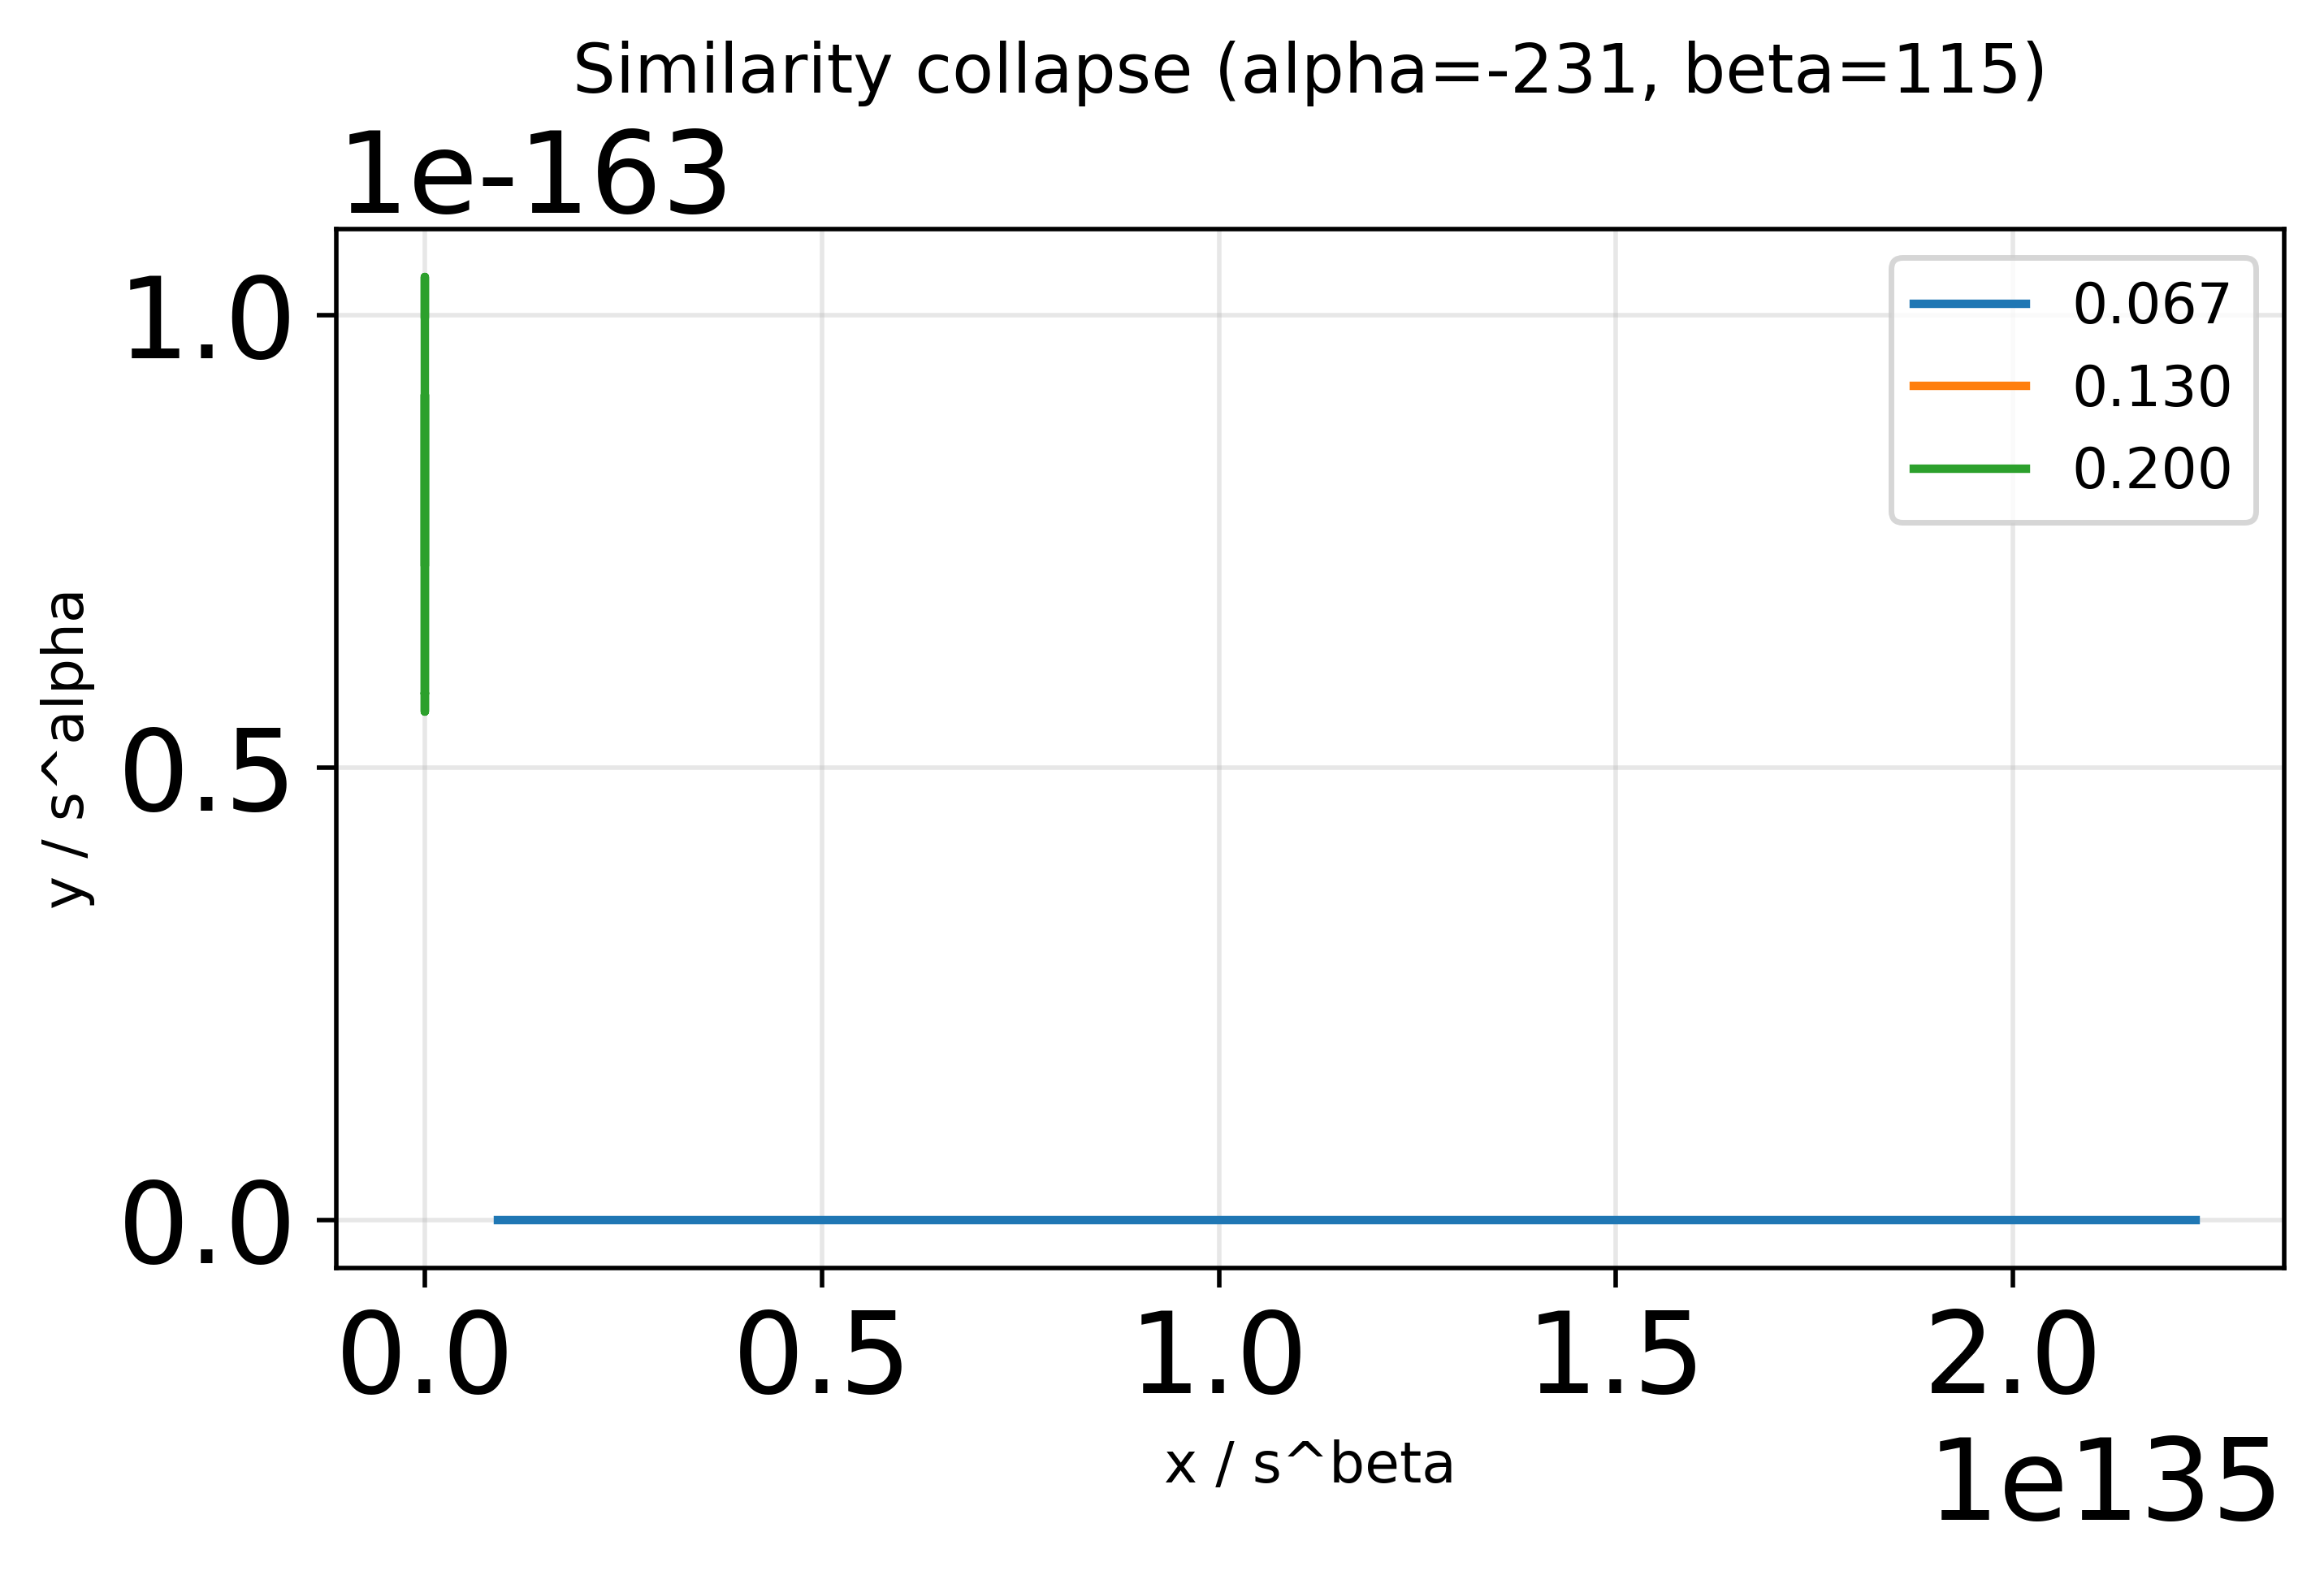

In [27]:
# Collapse analysis for your three curves (float128-safe and TeX-safe)
# Paste this whole cell and run. It uses your existing geom.mu and veer_* arrays.

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import least_squares, minimize
from scipy.interpolate import interp1d

# Disable LaTeX text rendering to avoid errors with '^' in labels
mpl.rcParams.update({
    "text.usetex": False,
    "axes.unicode_minus": False,
})

# -----------------------------------------
# Prepare data (cast to float64)
# -----------------------------------------
x = np.asarray(geom.mu, dtype=np.float64)  # common x-grid
Y = np.vstack([
    np.asarray(veer_067, dtype=np.float64),
    np.asarray(veer_130, dtype=np.float64),
    np.asarray(veer_200, dtype=np.float64),
])  # shape (3, n)
s = np.array([0.067, 0.130, 0.200], dtype=np.float64)

assert Y.ndim == 2 and Y.shape[1] == x.size, "veer_* arrays must be 1D and match len(geom.mu)"

# Reference curve index
jref = 0
x_ref = x.copy()
y_ref = Y[jref].copy()

# -----------------------------------------
# Helper functions (NaN-safe, float64)
# -----------------------------------------
def nrmse(y_true, y_pred):
    mask = np.isfinite(y_true) & np.isfinite(y_pred)
    if not np.any(mask):
        return np.nan
    y_true = y_true[mask]; y_pred = y_pred[mask]
    rng = max(np.ptp(y_true), 1e-12)
    return np.sqrt(np.mean((y_pred - y_true) ** 2)) / rng

def best_vert_scale(y_ref, y):
    mask = np.isfinite(y_ref) & np.isfinite(y)
    yr = y_ref[mask]; yt = y[mask]
    denom = float(np.dot(yr, yr))
    b = (np.dot(yr, yt) / denom) if denom != 0 else 0.0
    # ratio stats (avoid zeros)
    mask2 = mask & (np.abs(y_ref) > 1e-12)
    ratios = np.full_like(y_ref, np.nan, dtype=np.float64)
    ratios[mask2] = y[mask2] / y_ref[mask2]
    cv = np.nanstd(ratios) / (np.nanmean(np.abs(ratios)) + 1e-12)
    err = nrmse(y, b * y_ref)
    return float(b), float(cv), float(err)

def best_affine_y(y_ref, y):
    mask = np.isfinite(y_ref) & np.isfinite(y)
    yr = y_ref[mask].astype(np.float64)
    yt = y[mask].astype(np.float64)
    X = np.vstack([np.ones_like(yr), yr]).T
    a, b = np.linalg.lstsq(X, yt, rcond=None)[0]
    # reconstruct full prediction for NRMSE
    y_pred = np.full_like(y_ref, np.nan, dtype=np.float64)
    y_pred[mask] = a + b * yr
    err = nrmse(y, y_pred)
    return float(a), float(b), float(err)

def align_affine_xy(x, y_ref, x_i, y_i):
    # Fit y_i ≈ a + b * f(c*x_i + d), where f is spline of (x, y_ref)
    f = interp1d(x, y_ref, kind='cubic', bounds_error=False, fill_value='extrapolate')
    p0 = np.array([0.0, 1.0, 1.0, 0.0], dtype=np.float64)  # a, b, c, d
    def resid(p):
        a, b, c, d = p
        return a + b * f(c * x_i + d) - y_i
    res = least_squares(resid, p0)
    a, b, c, d = res.x.astype(np.float64)
    err = np.sqrt(np.mean(res.fun ** 2)) / (np.ptp(y_i) + 1e-12)
    return float(a), float(b), float(c), float(d), float(err)

def fit_similarity_exponents(x, Y, s, nbins=20):
    # Minimize scatter of y/s^alpha vs x/s^beta across all curves
    def scatter(alpha_beta):
        alpha, beta = alpha_beta
        xs_list, ys_list = [], []
        for j in range(len(s)):
            xs_list.append(x / (s[j] ** beta))
            ys_list.append(Y[j] / (s[j] ** alpha))
        xs = np.concatenate(xs_list)
        ys = np.concatenate(ys_list)
        mask = np.isfinite(xs) & np.isfinite(ys)
        xs = xs[mask]; ys = ys[mask]
        order = np.argsort(xs)
        xs = xs[order]; ys = ys[order]
        edges = np.linspace(xs.min(), xs.max(), nbins + 1)
        idx = np.clip(np.digitize(xs, edges) - 1, 0, nbins - 1)
        means = np.full(nbins, np.nan)
        for k in range(nbins):
            m = ys[idx == k]
            if m.size > 0:
                means[k] = m.mean()
        m_per_pt = means[idx]
        valid = np.isfinite(m_per_pt)
        if not np.any(valid):
            return np.inf
        resid = ys[valid] - m_per_pt[valid]
        return np.mean(resid ** 2)
    res = minimize(scatter, x0=np.array([0.0, 0.0], dtype=np.float64), method="Nelder-Mead")
    return res.x.astype(np.float64), float(res.fun)

# -----------------------------------------
# 1) Vertical scaling only
# -----------------------------------------
print("Model 1: vertical scaling only (y ≈ b(s) F(x))")
b_list, cv_list, nrmse_list = [], [], []
Y_vert = np.empty_like(Y)
for j in range(len(s)):
    if j == jref:
        b, cv, err = 1.0, 0.0, 0.0
    else:
        b, cv, err = best_vert_scale(y_ref, Y[j])
    b_list.append(b); cv_list.append(cv); nrmse_list.append(err)
    Y_vert[j] = Y[j] / (b if b != 0 else 1.0)
    print(f"s={s[j]:.3f}  b={b:.6g}  ratio CV={cv:.4f}  NRMSE={err:.4f}")

# -----------------------------------------
# 2) Vertical affine (offset + scale)
# -----------------------------------------
print("\nModel 2: vertical affine (y ≈ a(s) + b(s) F(x))")
Y_aff = np.empty_like(Y)
a_list, b2_list, nrmse2_list = [], [], []
for j in range(len(s)):
    if j == jref:
        a, b, err = 0.0, 1.0, 0.0
    else:
        a, b, err = best_affine_y(y_ref, Y[j])
    a_list.append(a); b2_list.append(b); nrmse2_list.append(err)
    Y_aff[j] = (Y[j] - a) / (b if b != 0 else 1.0)
    print(f"s={s[j]:.3f}  a={a:.4e}  b={b:.6g}  NRMSE={err:.4f}")

# -----------------------------------------
# 3) Affine in x and y (x' = c x + d, y' = (y-a)/b)
# -----------------------------------------
print("\nModel 3: affine in x and y (y ≈ a + b F(c x + d))")
x_xy = np.empty_like(Y)
y_xy = np.empty_like(Y)
xy_params = []
for j in range(len(s)):
    if j == jref:
        a, b, c, d, err = 0.0, 1.0, 1.0, 0.0, 0.0
    else:
        a, b, c, d, err = align_affine_xy(x_ref, y_ref, x, Y[j])
    xy_params.append((a, b, c, d, err))
    x_xy[j] = c * x + d
    y_xy[j] = (Y[j] - a) / (b if b != 0 else 1.0)
    print(f"s={s[j]:.3f}  a={a:.4e}  b={b:.6g}  c={c:.6g}  d={d:.6g}  NRMSE={err:.4f}")

# -----------------------------------------
# 4) Similarity collapse y = s^alpha F(x / s^beta)
# -----------------------------------------
(alpha, beta), obj = fit_similarity_exponents(x, Y, s, nbins=20)
print("\nModel 4: similarity collapse y = s^alpha F(x/s^beta)")
print(f"Estimated exponents: alpha={alpha:.6g}, beta={beta:.6g}, objective={obj:.3e}")

x_sim = [x / (s[j] ** beta) for j in range(len(s))]
y_sim = [Y[j] / (s[j] ** alpha) for j in range(len(s))]

# -----------------------------------------
# Plots
# -----------------------------------------
# Original
fig, ax = plt.subplots(figsize=(6, 4))
for j in range(len(s)):
    ax.plot(x, Y[j], label=f"{s[j]:.3f}")
ax.set_title("Original curves")
ax.set_xlabel("x"); ax.set_ylabel("y")
ax.legend(); ax.grid(True, alpha=0.3)

# Vertical scaling only
fig, ax = plt.subplots(figsize=(6, 4))
for j in range(len(s)):
    ax.plot(x, Y_vert[j], label=f"{s[j]:.3f}")
ax.set_title("Collapse by vertical scaling (divide by b)")
ax.set_xlabel("x"); ax.set_ylabel("y/b")
ax.legend(); ax.grid(True, alpha=0.3)

# Vertical affine
fig, ax = plt.subplots(figsize=(6, 4))
for j in range(len(s)):
    ax.plot(x, Y_aff[j], label=f"{s[j]:.3f}")
ax.set_title("Collapse by vertical affine ((y-a)/b)")
ax.set_xlabel("x"); ax.set_ylabel("(y-a)/b")
ax.legend(); ax.grid(True, alpha=0.3)

# Affine in x and y
fig, ax = plt.subplots(figsize=(6, 4))
for j in range(len(s)):
    ax.plot(x_xy[j], y_xy[j], label=f"{s[j]:.3f}")
ax.set_title("Collapse by affine x and y (x' = c x + d, y' = (y-a)/b)")
ax.set_xlabel("x'"); ax.set_ylabel("y'")
ax.legend(); ax.grid(True, alpha=0.3)

# Similarity collapse
fig, ax = plt.subplots(figsize=(6, 4))
for j in range(len(s)):
    ax.plot(x_sim[j], y_sim[j], label=f"{s[j]:.3f}")
ax.set_title(f"Similarity collapse (alpha={alpha:.3g}, beta={beta:.3g})")
# Avoid LaTeX-sensitive labels
ax.set_xlabel("x / s^beta"); ax.set_ylabel("y / s^alpha")
ax.legend(); ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Generalize the successful Model 3 (affine in x and y) so you can predict
# unseen curves by interpolating the alignment parameters over s.
#
# It also explains the transformation in comments.

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from scipy.interpolate import interp1d, PchipInterpolator

# TeX off for safe labels
mpl.rcParams.update({"text.usetex": False, "axes.unicode_minus": False})

# --------------------------
# Data (use what you already have)
# --------------------------
x = np.asarray(geom.mu, dtype=np.float64)  # common x-grid
Y = np.vstack([
    np.asarray(veer_067, dtype=np.float64),
    np.asarray(veer_130, dtype=np.float64),
    np.asarray(veer_200, dtype=np.float64),
])  # shape (m, n)
s = np.array([0.067, 0.130, 0.200], dtype=np.float64)

assert Y.shape[1] == x.size

# --------------------------
# Core alignment routine
# --------------------------
def align_affine_xy(x_ref, y_ref, x_i, y_i, c0=1.0, d0=0.0):
    """
    Fit parameters a, b, c, d in:
        y_i(x) ≈ a + b * F(c*x + d)
    where F is the cubic spline through the reference curve (x_ref, y_ref).
    a: vertical offset         -> moves curve up/down (baseline)
    b: vertical scale (gain)   -> rescales amplitude
    c: horizontal scale        -> stretches/compresses x (c>1 stretches x)
    d: horizontal shift        -> shifts along x

    We solve a nonlinear least squares for c,d together with a,b.
    """
    F = interp1d(x_ref, y_ref, kind="cubic", bounds_error=False, fill_value="extrapolate")
    p0 = np.array([0.0, 1.0, float(c0), float(d0)], dtype=np.float64)  # a,b,c,d

    def resid(p):
        a, b, c, d = p
        return a + b * F(c * x_i + d) - y_i

    res = least_squares(resid, p0)
    a, b, c, d = res.x
    rmse = np.sqrt(np.mean(res.fun**2))
    return float(a), float(b), float(c), float(d), float(rmse)

# --------------------------
# Fit parameters vs s (relative to a reference curve)
# --------------------------
ref_idx = 0
x_ref = x.copy()
y_ref = Y[ref_idx].copy()

params = []  # (a,b,c,d,rmse) for each curve
for j in range(len(s)):
    if j == ref_idx:
        params.append((0.0, 1.0, 1.0, 0.0, 0.0))
    else:
        params.append(align_affine_xy(x_ref, y_ref, x, Y[j]))

params = np.array(params)  # shape (m, 5)
a_vals, b_vals, c_vals, d_vals, rmse_vals = params.T

print("Fitted parameters per curve (relative to reference):")
for sj, (a, b, c, d, e) in zip(s, params):
    print(f"s={sj:.3f}: a={a:.4e}, b={b:.4f}, c={c:.4f}, d={d:.4f}, RMSE={e:.3e}")

# --------------------------
# Build smooth interpolators a(s), b(s), c(s), d(s)
# With only 3 samples, PCHIP (shape-preserving) or linear is safest.
# --------------------------
def make_interp(x_s, y_s):
    # Use PCHIP if >= 3 unique s, else fall back to linear
    if np.unique(x_s).size >= 3:
        return PchipInterpolator(x_s, y_s, extrapolate=True)
    else:
        return interp1d(x_s, y_s, kind="linear", fill_value="extrapolate", assume_sorted=True)

A_of_s = make_interp(s, a_vals)
B_of_s = make_interp(s, b_vals)
C_of_s = make_interp(s, c_vals)
D_of_s = make_interp(s, d_vals)

# Reference master curve F (spline of the reference curve)
F = interp1d(x_ref, y_ref, kind="cubic", bounds_error=False, fill_value="extrapolate")

def predict_curve(s_new, x_eval=None):
    """
    Predict y(x; s_new) using the affine-in-x-and-y model with parameters
    interpolated over s.

    y_pred(x) = a(s_new) + b(s_new) * F( c(s_new)*x + d(s_new) )

    x_eval: grid to evaluate on (default: same as reference x grid).
    Returns x_eval, y_pred.
    """
    if x_eval is None:
        x_eval = x_ref
    a = float(A_of_s(s_new))
    b = float(B_of_s(s_new))
    c = float(C_of_s(s_new))
    d = float(D_of_s(s_new))
    y_pred = a + b * F(c * np.asarray(x_eval) + d)
    return np.asarray(x_eval), np.asarray(y_pred)

# --------------------------
# Example: predict at an unseen parameter value and visualize
# --------------------------
s_new = 0.160
x_new, y_new = predict_curve(s_new)

plt.figure(figsize=(6, 4))
# known curves
for j in range(len(s)):
    plt.plot(x, Y[j], label=f"data s={s[j]:.3f}")
# prediction
plt.plot(x_new, y_new, "k--", lw=2, label=f"pred s={s_new:.3f}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Affine-in-x-and-y model: prediction by interpolating parameters")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --------------------------
# Plain-language explanation of the transformation (printed)
# --------------------------
explanation = """
Model 3 assumes that all curves share one common 'shape' F(x), but each curve
is allowed to be shifted and scaled in BOTH axes:

    y(x; s) ≈ a(s) + b(s) * F( c(s)*x + d(s) )

- F(x) is a template built from a reference curve (we use a cubic spline
  through the curve at s = {:.3f}).
- a(s) moves the curve up or down (a vertical offset).
- b(s) scales the amplitude (a vertical gain).
- c(s) stretches or compresses the x-axis (horizontal scale).
- d(s) shifts the curve left/right (horizontal shift).

We estimate (a,b,c,d) for each available curve by minimizing the squared
difference between the transformed template and the observed curve. Once we
have (a,b,c,d) at several s values, we treat them as smooth functions of s,
interpolate them, and predict new curves by plugging the interpolated values
into the same formula.

In other words: to get a new curve at s*, we don't learn a brand new shape;
we just take the reference shape F and 'warp' it: stretch/shift along x and
offset/scale along y, using parameters a(s*), b(s*), c(s*), d(s*) obtained by
interpolating the fitted parameters across the known s values.
""".format(s[ref_idx])
print(explanation)

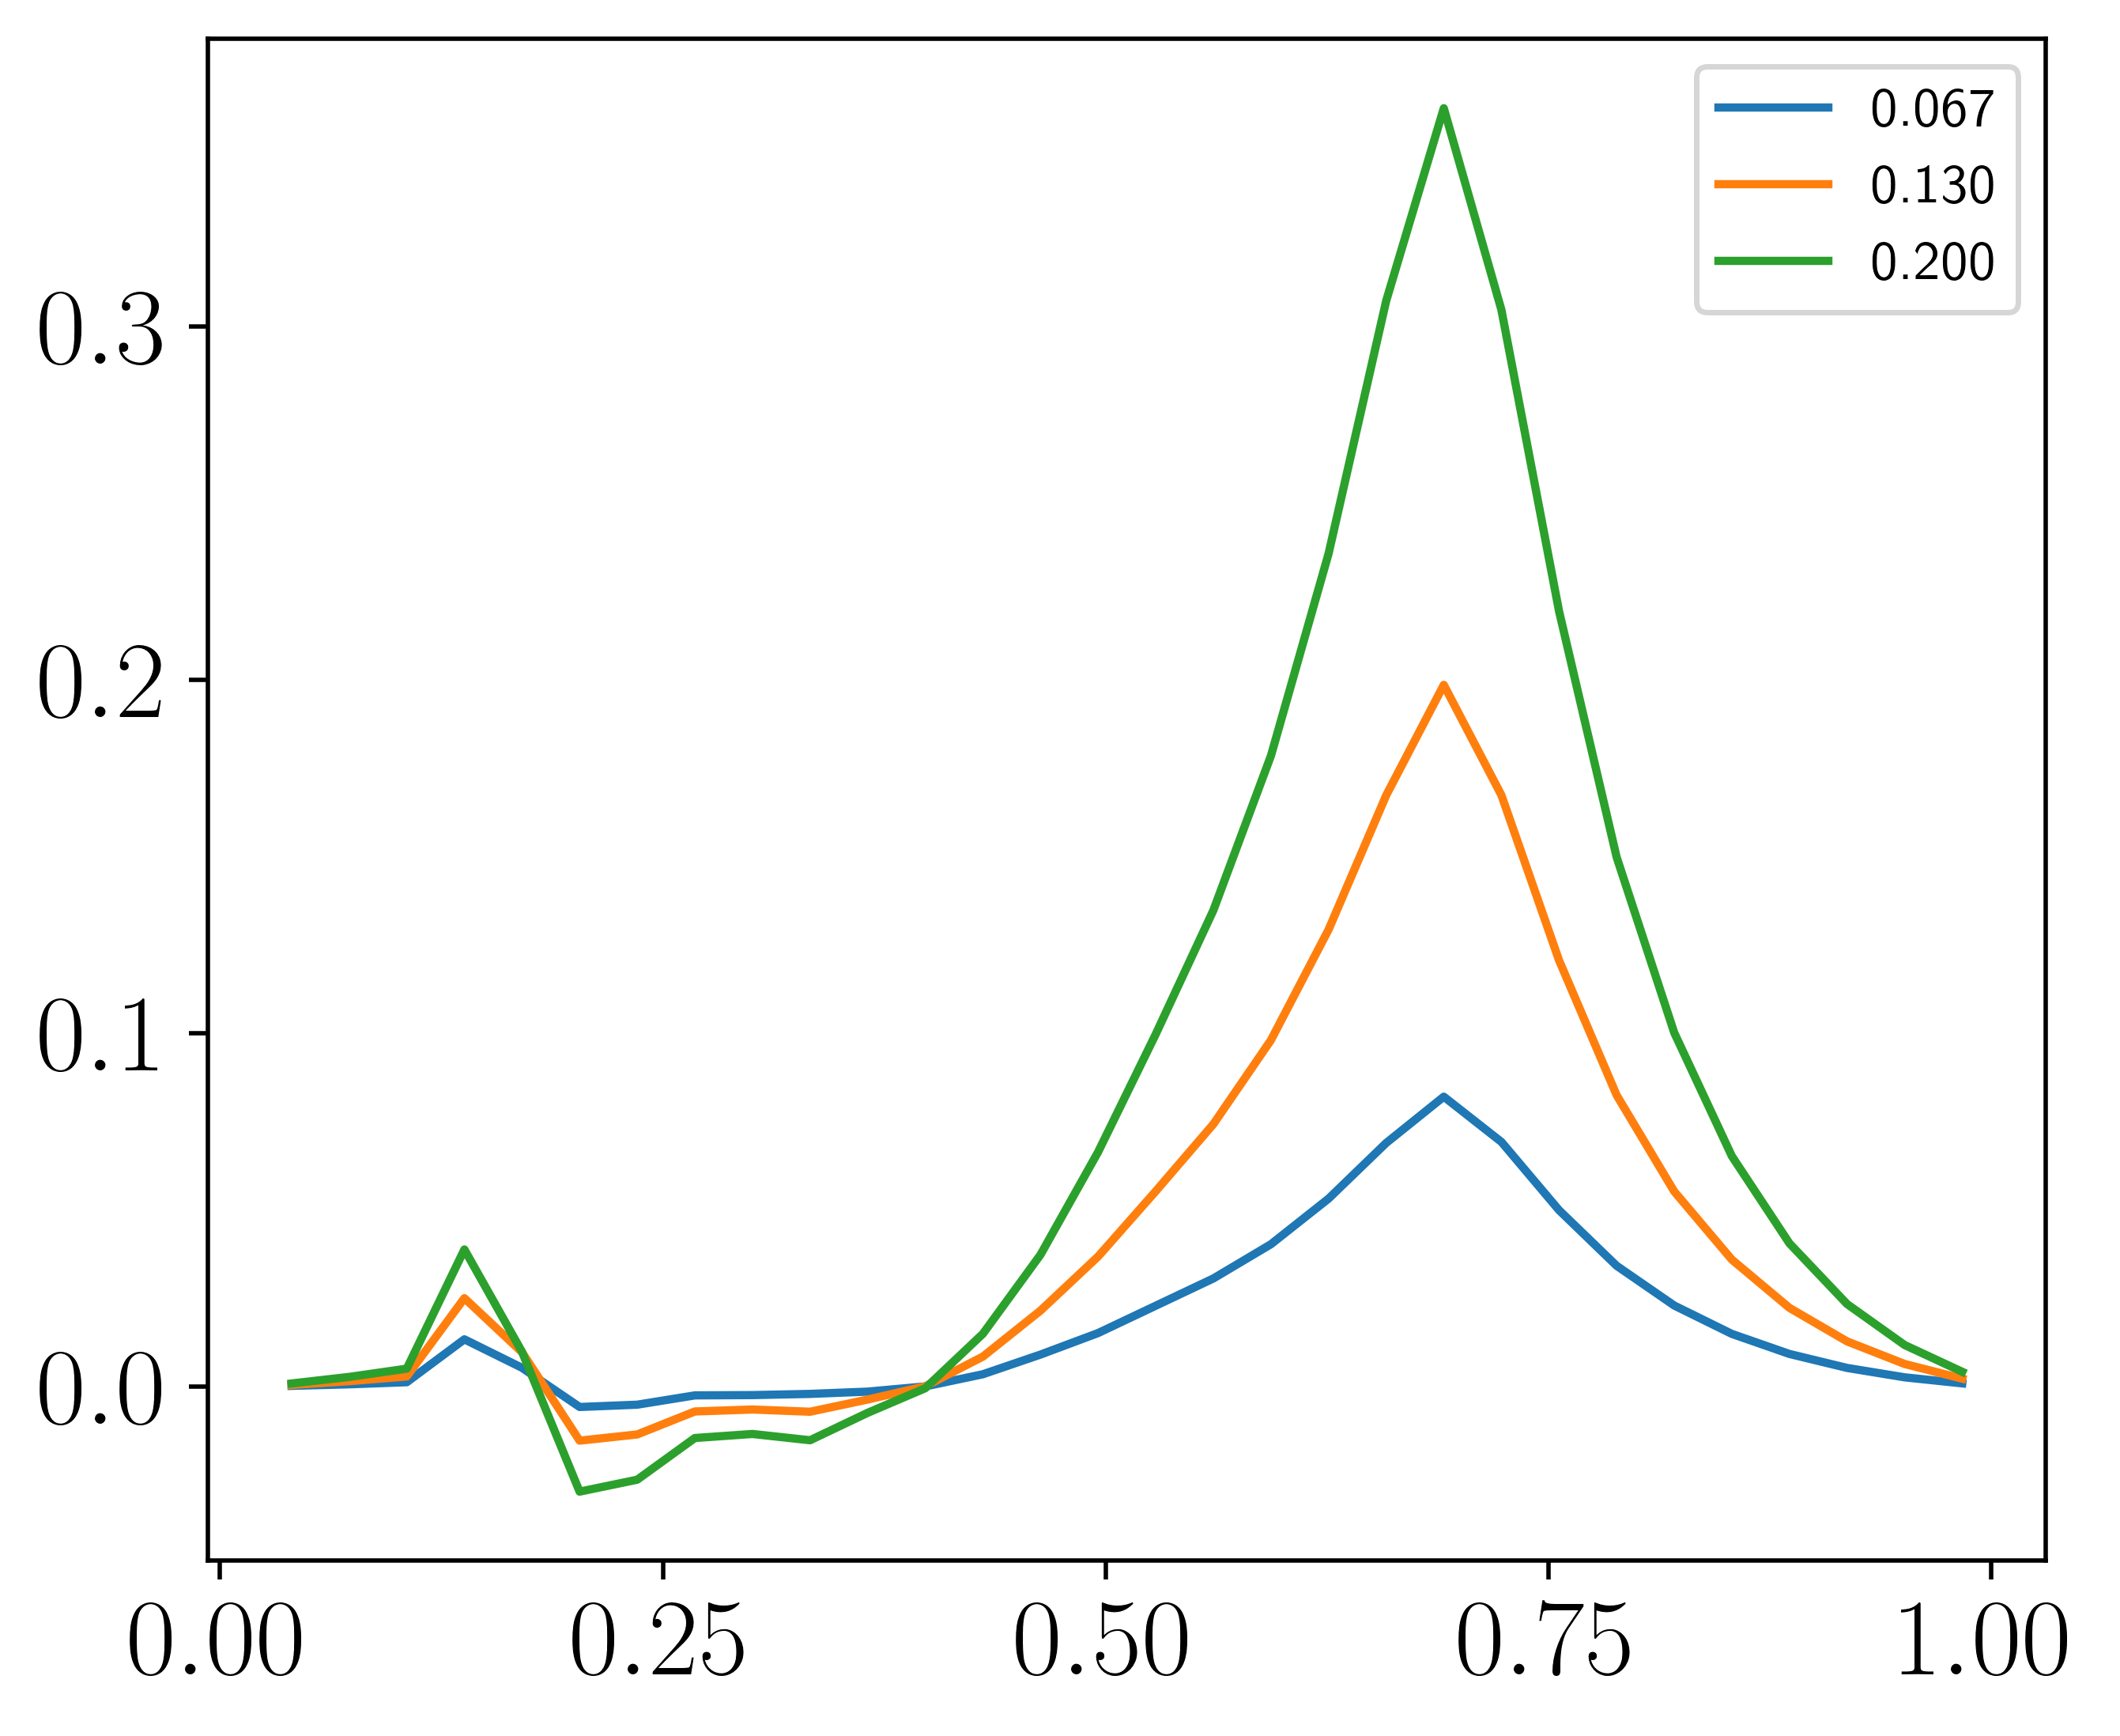

In [17]:
from MITRotor import IEA10MW, BEMGeometry

rotor = IEA10MW()
geom = BEMGeometry(Nr = 30, Ntheta=160, R=rotor.R, Rhub=rotor.hub_radius)

veer_067 = train_data['cotp_annulus'][:,18] - train_data['cotp_annulus'][:,17]
veer_130 = train_data['cotp_annulus'][:,19] - train_data['cotp_annulus'][:,17]
veer_200 = train_data['cotp_annulus'][:,20] - train_data['cotp_annulus'][:,17]

fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(geom.mu, veer_067, label='0.067')
ax.plot(geom.mu, veer_130, label='0.130')
ax.plot(geom.mu, veer_200, label='0.200')

ax.legend()

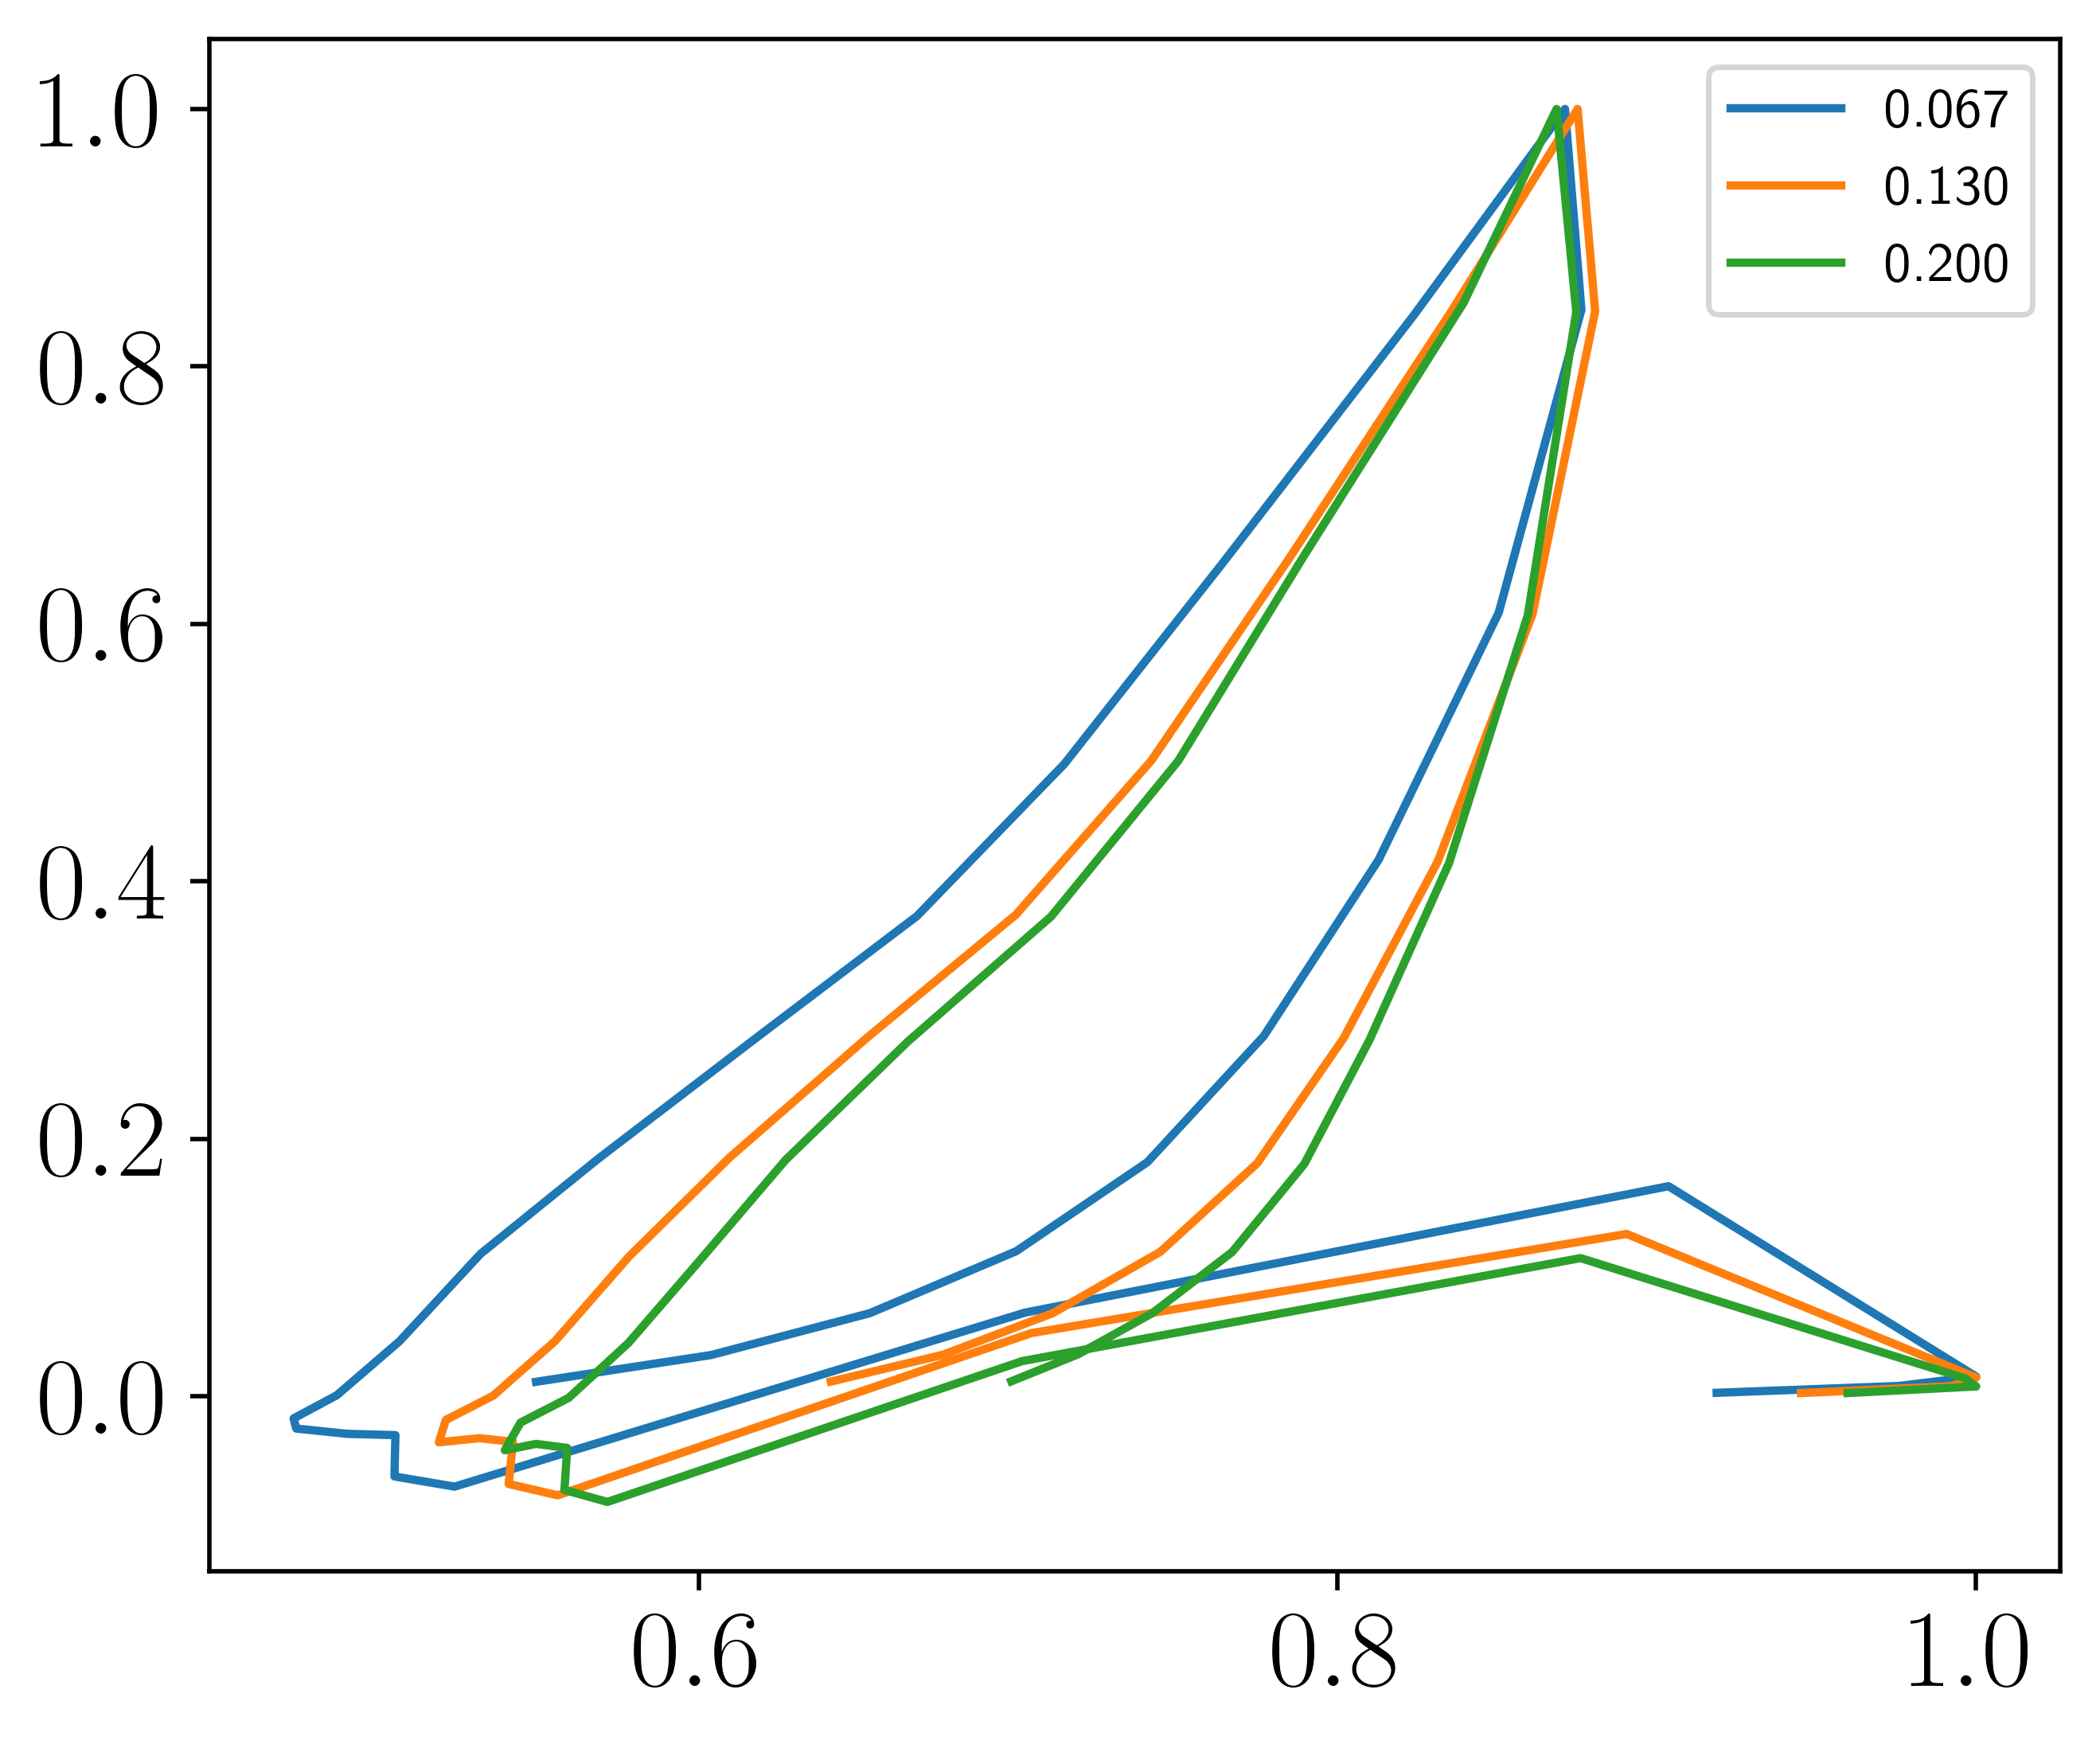

In [19]:
from MITRotor import IEA10MW, BEMGeometry

rotor = IEA10MW()
geom = BEMGeometry(Nr = 30, Ntheta=160, R=rotor.R, Rhub=rotor.hub_radius)

veer_067_ctp = train_data['cotp_annulus'][:,18] - train_data['cotp_annulus'][:,17]
veer_130_ctp = train_data['cotp_annulus'][:,19] - train_data['cotp_annulus'][:,17]
veer_200_ctp = train_data['cotp_annulus'][:,20] - train_data['cotp_annulus'][:,17]

veer_067_ind = train_data['ind_annulus'][:,18] - train_data['ind_annulus'][:,17]
veer_130_ind = train_data['ind_annulus'][:,19] - train_data['ind_annulus'][:,17]
veer_200_ind = train_data['ind_annulus'][:,20] - train_data['ind_annulus'][:,17]

fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(veer_067_ind/max(veer_067_ind), veer_067_ctp/max(veer_067_ctp), label='0.067')
ax.plot(veer_130_ind/max(veer_130_ind), veer_130_ctp/max(veer_130_ctp), label='0.130')
ax.plot(veer_200_ind/max(veer_200_ind), veer_200_ctp/max(veer_200_ctp), label='0.200')

ax.legend()

In [12]:
((train_data['ind_annulus'][:,17] - train_data['ind_annulus'][:,18])**2 + (train_data['cotp_annulus'][:,17] - train_data['cotp_annulus'][:,18])**2)**(1/2)

array([0.00395597, 0.00424504, 0.00447714, 0.01393911, 0.00612111,
       0.00618863, 0.00555603, 0.00329734, 0.00319284, 0.00289844,
       0.00247812, 0.00209295, 0.00412193, 0.00935329, 0.01536053,
       0.02304403, 0.03074379, 0.04042041, 0.0533094 , 0.06904278,
       0.08214747, 0.06936278, 0.05008262, 0.03437746, 0.02319605,
       0.01526065, 0.00971937, 0.00599118, 0.00369396, 0.00253231],
      dtype=float128)

In [10]:
(train_data['cotp_annulus'][:,17] - train_data['cotp_annulus'][:,18])**2

array([4.71419572e-08, 4.24388092e-07, 1.55964919e-06, 1.79203903e-04,
       2.83572450e-05, 3.32338237e-05, 2.61619388e-05, 6.15936713e-06,
       5.75787419e-06, 4.25010915e-06, 2.00428872e-06, 3.67577509e-09,
       1.22536124e-05, 8.22603809e-05, 2.29968914e-04, 5.23961605e-04,
       9.36924853e-04, 1.62437446e-03, 2.83109153e-03, 4.75435352e-03,
       6.73417571e-03, 4.79699770e-03, 2.49489910e-03, 1.16959609e-03,
       5.26900019e-04, 2.22752201e-04, 8.54251774e-05, 2.80002003e-05,
       6.90427107e-06, 8.41541153e-07], dtype=float128)

/tmp/ipykernel_581729/1936763445.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues', 30)


(-0.25, 6.0)

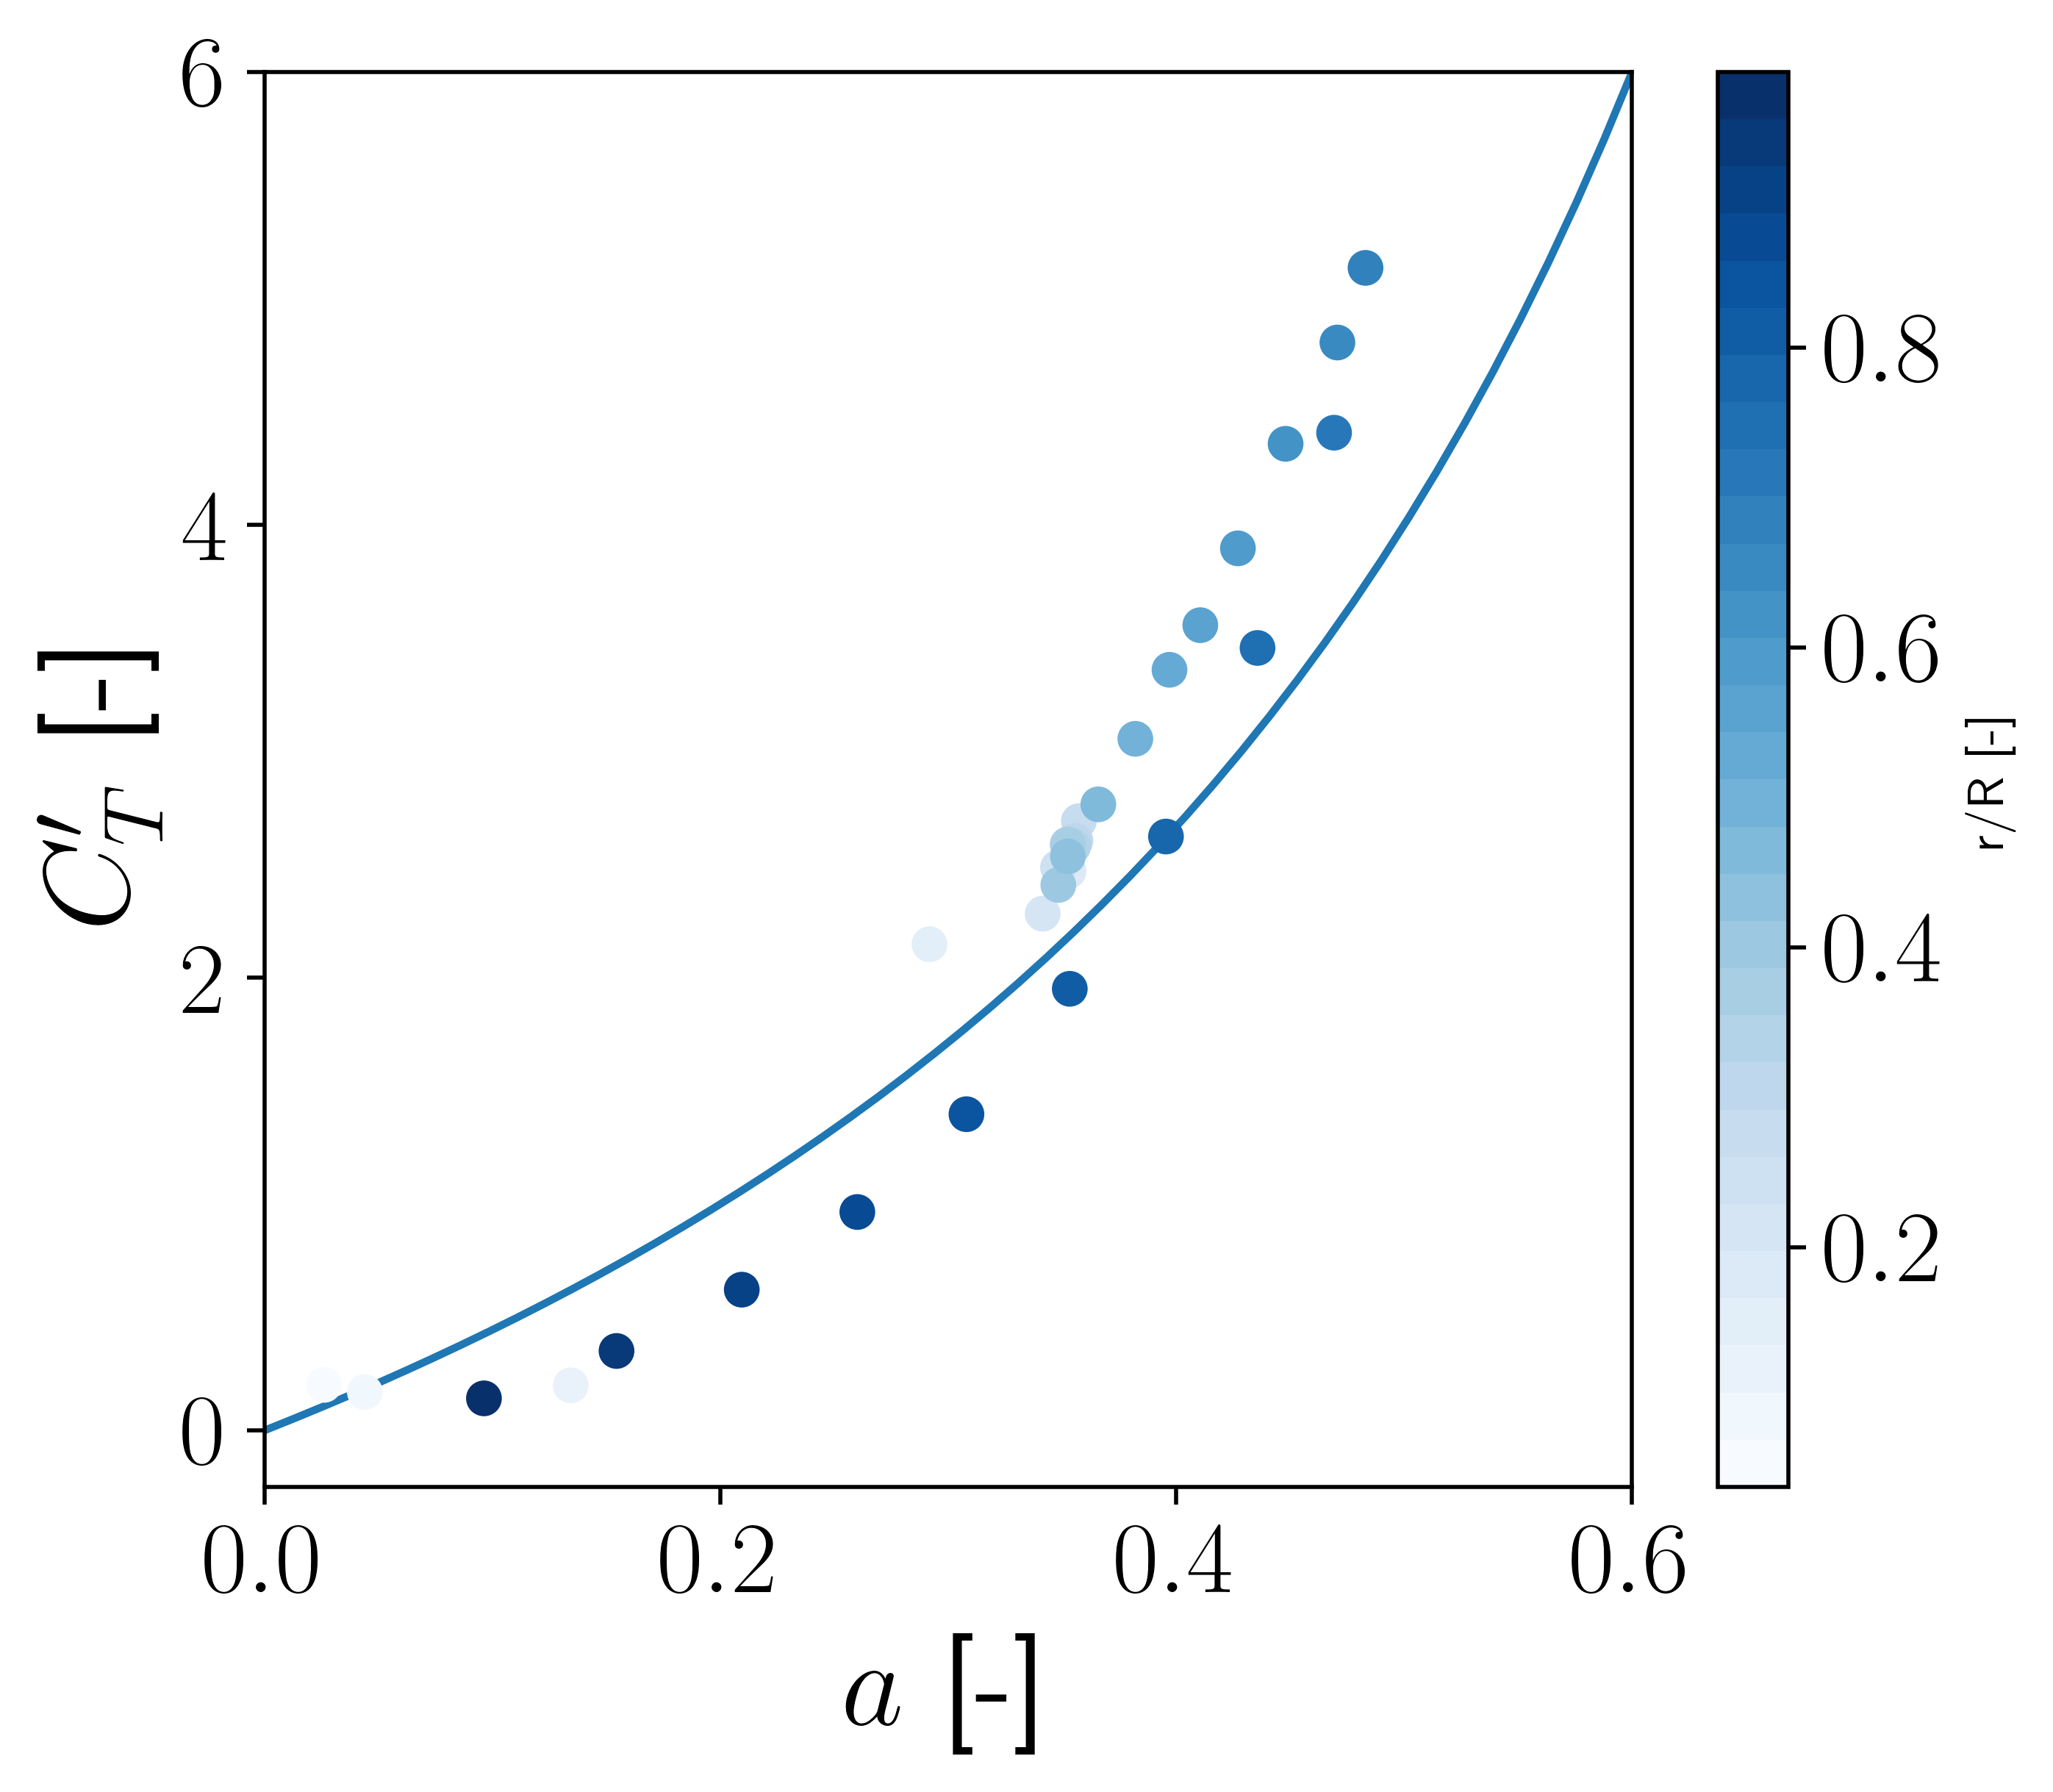

In [7]:
fig, ax = plt.subplots(figsize=(6, 5))

from MITRotor import IEA10MW, BEMGeometry

rotor = IEA10MW()
geom = BEMGeometry(Nr = 30, Ntheta=160, R=rotor.R, Rhub=rotor.hub_radius)


a = np.linspace(0,0.6,50)
# CT_formula = 4 * a * (1 - a)
CT_formula = 4 * a / (1 - a)

veer_n200 = [0,7,14,21,28]
veer_n130 = [1,8,15,22,29]
veer_n067 = [2,9,16,23,30]
veer_000  = [3,10,17,24,31]
veer_067  = [4,11,18,25,32]
veer_130  = [5,12,19,26,33]
veer_200  = [6,13,20,27,34]

uniform = 17

ax.plot(a,CT_formula,zorder=1)

# grab the data at index 17
x = train_data['ind_annulus'][:, 17]
y = train_data['cotp_annulus'][:, 17]

# this is your "colorbar axis" variable (must have same length as x,y)
cbar_vals = geom.mu   # <-- replace with your vector

# discrete colormap with 30 colors
cmap = plt.cm.get_cmap('Blues', 30)

# plot, mapping cbar_vals to colormap
sc = ax.scatter(x, y, c=cbar_vals, cmap=cmap, zorder=2)

# colorbar scaled to cbar_vals
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("r/R [-]")   # label it with the physical quantity

ax.set_ylabel("$C_T'$ [-]", fontsize=fontsize)
ax.set_xlabel("$a$ [-]", fontsize=fontsize)

ax.set_xlim([0, 0.6])
ax.set_ylim([-0.25, 6])


In [74]:
rotor_data = gpr.generate_train_data(opt_params, D=199, rotor_data=True)

allocation      : ATM170028
partition       : spr
runtime         : 12:00:00
system          : stampede
num_nodes       : 2
exclude_time    : 7
save_interval   : 10
base_dir        : /scratch/09909/smata/wrf_les_sweep/runs/10MW/rate/train
gp_dir          : /scratch/09909/smata/induction_modeling/gaussian_process/10MW/train_data/
field_data_path : /scratch/09909/smata/induction_modeling/gaussian_process/10MW/train_data/processedData/
wrf_path        : /work2/09909/smata/stampede3/WRF_LES
template_path   : /scratch/09909/smata/wrf_les_sweep/templates
turb_model      : iea10MW
rotor_model     : GAD
slice_loc       : 1
print_table     : True
plot_outer      : True
save_outer      : False
outer_align     : False
plot_inner      : True
save_inner      : False
save_both       : False
outer_pad       : 75
plot_profiles   : True
save_profiles   : True
batch_submit    : True
prof_type       : Idealized
shear_type      : Rate
shear           : [-0.025, -0.015, 0, 0.015, 0.025]
veer            : [

In [8]:
gpr.print_stats(train_data)

Variable Statistics:
---------------------------------------------------------------------------
Name                 |       Mean |    Std Dev |        Min |        Max
---------------------------------------------------------------------------
r_annulus            |   50.95000 |   28.01478 |    4.01833 |   97.88167
cot_local            |    0.90022 |    0.39981 |    0.08741 |    1.58606
ind_local            |    0.32628 |    0.12722 |   -0.03939 |    0.70199
cot_annulus          |    0.90022 |    0.39008 |    0.11246 |    1.38279
ind_annulus          |    0.32628 |    0.12190 |    0.01015 |    0.50941
cot_rotor            |    0.89344 |    0.00761 |    0.87670 |    0.90726
ind_rotor            |    0.34160 |    0.00649 |    0.33216 |    0.35847
shears_rotor         |   -0.00000 |    0.01844 |   -0.02500 |    0.02500
veers_rotor          |   -0.00000 |    0.13244 |   -0.20000 |    0.20000
shears_annulus       |    0.00000 |    0.01844 |   -0.02500 |    0.02500
veers_annulus        |  

In [21]:
# Compute shear regime, generate scalars, and standardize
opt_params['gp_base_path']          = '/home1/09909/smata/dir_scratch/induction_modeling/gaussian_process/10MW'
opt_params['kernel_file']           = '/results/rotor_CTp/wrf_10MW_rot_CTp_D2_result.txt'
         
opt_params['train_data']            = '/train_data/wrf_10MW_rot_CTp.mat'
opt_params['test_data']             = '/test_data/wrf_10MW_rot_CTp.mat'

opt_params['scaler_cot_annulus']    = '/train_data/scaler_wrf_cot_ann.pkl',
opt_params['scaler_ind_annulus']    = '/train_data/scaler_wrf_ind_ann.pkl',
opt_params['scaler_cot_rotor']      = '/train_data/scaler_wrf_cot_rot.pkl',
opt_params['scaler_ind_rotor']      = '/train_data/scaler_wrf_ind_rot.pkl',
opt_params['scaler_shears_rotor']   = '/train_data/scaler_shears_rot.pkl',
opt_params['scaler_veers_rotor']    = '/train_data/scaler_veers_rot.pkl',
opt_params['scaler_shears_annulus'] = '/train_data/scaler_shears_ann.pkl',
opt_params['scaler_veers_annulus']  = '/train_data/scaler_veers_ann.pkl',
opt_params['encoder_rotor']         = '/train_data/encoder_rot.pkl',
opt_params['encoder_annulus']       = '/train_data/encoder_ann.pkl',
opt_params['scaler_cotp_rotor']     = '/train_data/scaler_wrf_cotp_rot.pkl',

scalars = gpr.load_scalars(opt_params)

In [22]:
_, gpr_kernel = postproc.build_kernel_from_search(opt_params, noise = True)

Kernel line:
ScoredKernel(k_opt=ProductKernel([ MaskKernel(ndim=3, active_dimension=1, base_kernel=RQKernel(lengthscale=0.910251, output_variance=0.212985, alpha=-1.692454)), MaskKernel(ndim=3, active_dimension=2, base_kernel=SqExpKernel(lengthscale=0.556557, output_variance=1.313249)) ]), nll=-13.633844, laplace_nle=nan, bic_nle=-13.046296, noise=[-4.51187185])

Noise:
-4.51187185

Kernel specification string:
ProductKernel([ MaskKernel(ndim=3, active_dimension=1, base_kernel=RQKernel(lengthscale=0.910251, output_variance=0.212985, alpha=-1.692454)), MaskKernel(ndim=3, active_dimension=2, base_kernel=SqExpKernel(lengthscale=0.556557, output_variance=1.313249)) ])

Kernel structure:
{'children': [{'active_dimension': 1,
               'base_kernel': {'alpha': -1.692454,
                               'lengthscale': 0.910251,
                               'type': 'rq',
                               'variance': 0.212985},
               'ndim': 3,
               'type': 'mask'},
      

In [23]:
X_train, y_train, X_test, y_test = postproc.extract_data(opt_params, transform = False)

In [24]:
gpr_kernel.fit(X_train, y_train)

GaussianProcessRegressor(kernel=MaskedKernel(1.11**2 * RationalQuadratic(alpha=0.184, length_scale=2.48), active_dims=[1]) * MaskedKernel(1.93**2 * RBF(length_scale=1.74), active_dims=[2]) + WhiteKernel(noise_level=0.011),
                         optimizer=None)

In [62]:
import pickle
import os

with open(os.path.join('/scratch/09909/smata/induction_modeling/gaussian_process/10MW/results/rotor/opr_kernel.pkl'), 'wb') as f:
    pickle.dump(gpr_kernel, f)

In [63]:
casenames = np.load('/scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/sweep_names.npy')
U_inf     = np.load('/scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/U_inf.npy')
dir_inf   = np.load('/scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/dir_inf.npy')
U_disk    = np.load('/scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/U_disk.npy')
dir_disk  = np.load('/scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/dir_disk.npy')
Uhub      = np.load('/scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/Uhub.npy')
wrf_omg   = np.load('/scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/wrf_omg.npy')
pitch     = np.load('/scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/pitch.npy')

wrf_tsr   = 2 * np.pi / 60 * 99.5 / 7 * wrf_omg

In [64]:
indices = [14,15,16,17,18,19,20]

In [65]:
veers = np.array([-0.2,-0.13,-0.067,0.0,0.067,0.13,0.2])

In [66]:
from MITRotor import BEM, BEMGeometry, IEA10MW, NoTipLoss, WRFLESAerodynamics, NoTangentialInduction, ConstantInduction_GP_CTprime

In [67]:
rotor = IEA10MW()

gpr_ind = np.zeros_like(indices, dtype='float')
gpr_cot = np.zeros_like(indices, dtype='float')
gpr_thr = np.zeros_like(indices, dtype='float')
gpr_cop = np.zeros_like(indices, dtype='float')
gpr_pow = np.zeros_like(indices, dtype='float')
iters   = np.zeros_like(indices, dtype='float')

Nelm = 30
Nsct = 160

for count in range(len(gpr_ind)):

    index = indices[count]

    bem = BEM(rotor=rotor, geometry=BEMGeometry(Nr=Nelm,Ntheta=Nsct,R=rotor.R, Rhub = rotor.hub_radius), aerodynamic_model=WRFLESAerodynamics(), tiploss_model=NoTipLoss(), momentum_model=ConstantInduction_GP_CTprime(veer = veers[count]), tangential_induction_model=NoTangentialInduction())

    sol = bem(pitch[index], wrf_tsr[index], 0, v_inf = Uhub[index], U = U_inf[:,:,index]/Uhub[index], wdir=dir_inf[:,:,index], veer = veers[count])

    gpr_cot[count] = sol.Ct()
    gpr_thr[count] = sol.thrust()/1e3
    gpr_pow[count] = sol.power()/1e6
    gpr_cop[count] = sol.Cp()
    gpr_ind[count] = sol.a()
    iters[count]   = sol.niter
    
iters

array([3., 3., 4., 4., 3., 3., 3.])

In [68]:
gpr_ind

array([0.34315321, 0.33930985, 0.33732013, 0.3374742 , 0.34032133,
       0.34528974, 0.35253342])

In [69]:
train_data['ind_rotor'][indices]

array([0.34310291, 0.3392515 , 0.33729761, 0.33744342, 0.34038427,
       0.34533207, 0.35254878])

In [24]:
gpr_cot

array([0.89734957, 0.89609249, 0.89423842, 0.89193577, 0.88976545,
       0.88825958, 0.88851589])

In [28]:
pitch[14]

np.float64(0.023691274225711823)

In [51]:
X_train, y_train, X_test, y_test = postproc.extract_data(opt_params, transform = False)

gpr_kernel.fit(X_train, y_train)

GaussianProcessRegressor(kernel=MaskedKernel(1.47**2 * RBF(length_scale=47.8), active_dims=[0]) * MaskedKernel(3.5**2 * RationalQuadratic(alpha=1.43e-05, length_scale=192), active_dims=[1]) * MaskedKernel(1.35**2 * RationalQuadratic(alpha=0.0104, length_scale=112), active_dims=[2]) + WhiteKernel(noise_level=0.000586),
                         optimizer=None)

In [52]:
# X_t_rot = scalars['scaler_cot_rotor'].inverse_transform(X_train[:,0].reshape(-1, 1)).ravel()
# y_t_rot = scalars['scaler_ind_rotor'].inverse_transform(y_train.reshape(-1, 1)).ravel()
# A_pred = gpr_kernel.predict(X_train, return_std=False)

X_t_rot = scalars['scaler_cot_rotor'].inverse_transform(X_test[:,0].reshape(-1, 1)).ravel()
y_t_rot = scalars['scaler_ind_rotor'].inverse_transform(y_test.reshape(-1, 1)).ravel()
A_pred = gpr_kernel.predict(X_test, return_std=False)

A_pred = scalars['scaler_ind_rotor'].inverse_transform(A_pred.reshape(-1, 1))

rmse = np.sqrt(mean_squared_error(y_t_rot, A_pred))

rmse

np.float64(0.0003598501618489925)

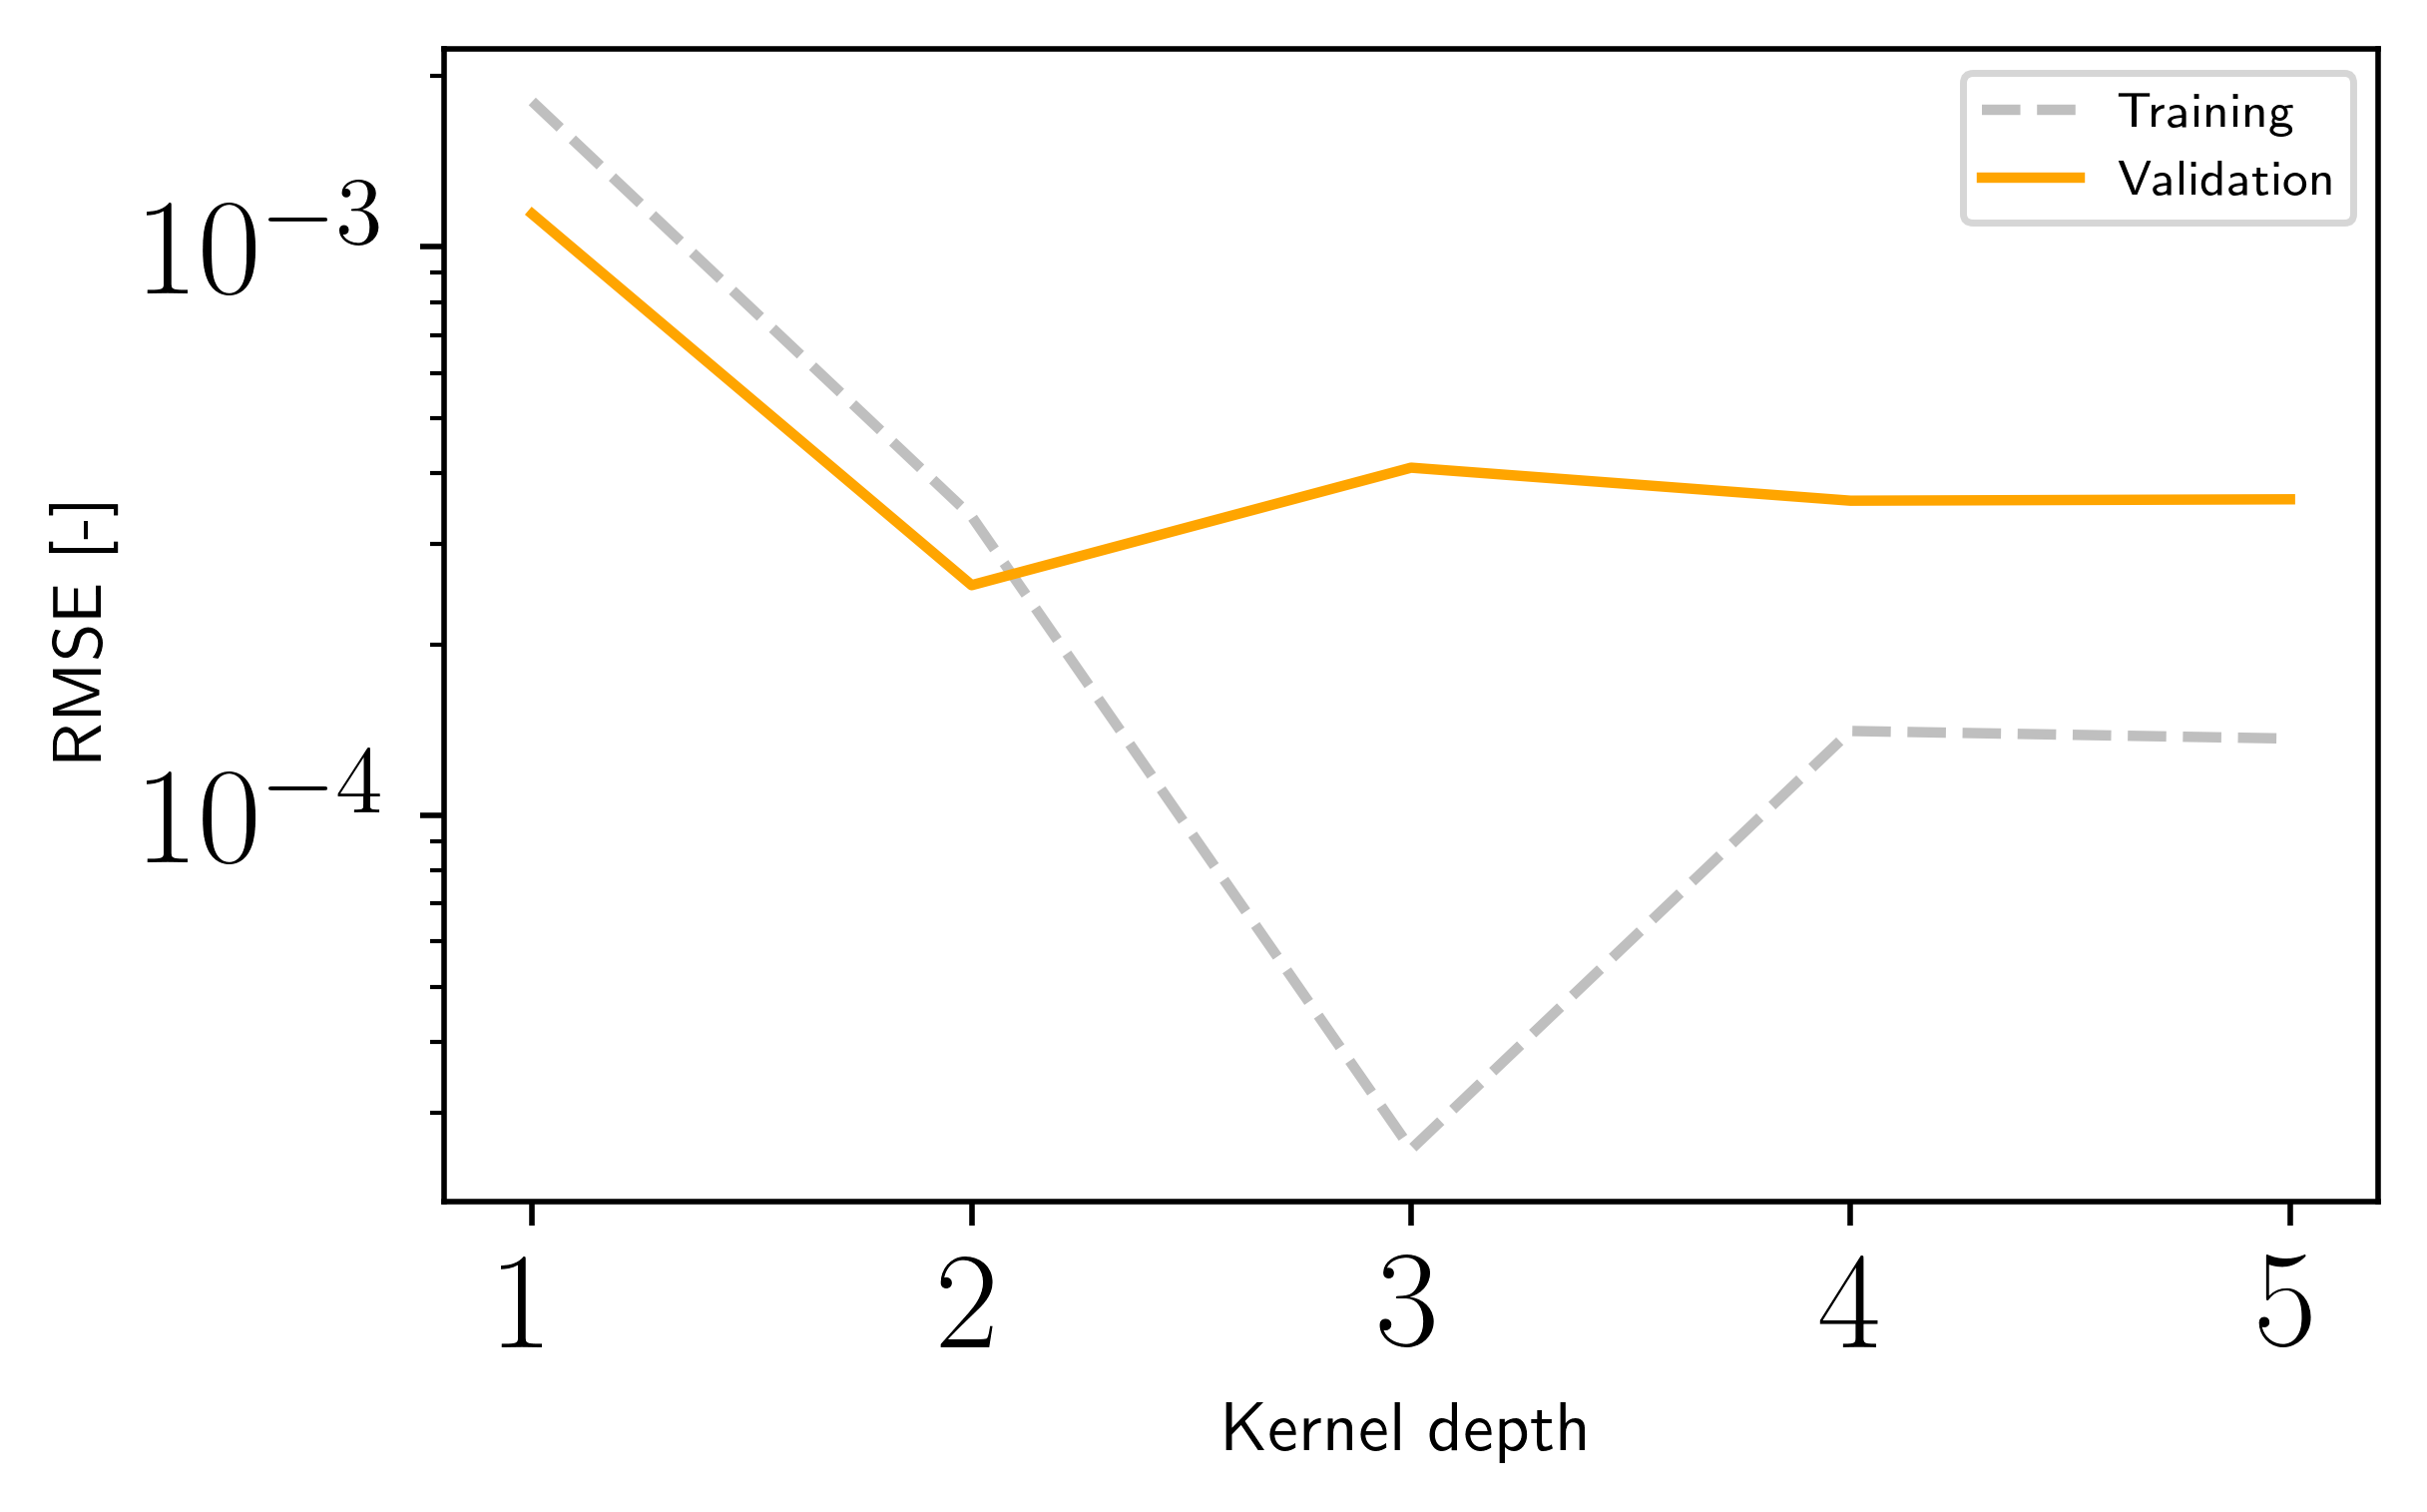

In [53]:
fig, ax = plt.subplots(figsize=(5, 3))

train    = [0.001802761751796299, 0.00033574940317412146, 2.5870841957569495e-05, 0.00014080412920723764, 0.00013654864751824975]
validate = [0.0011424834768670943, 0.00025414787634468706, 0.00040901557054824107, 0.0003578103634012965, 0.0003598501618489925]

depth = [1, 2, 3, 4, 5] 

ax.semilogy(depth,train,linestyle='--',color='grey',label='Training',alpha=0.5)
ax.semilogy(depth,validate,color='orange',label='Validation')

ax.set_ylabel('RMSE [-]')
ax.set_xlabel('Kernel depth')

ax.set_xticks(depth)

ax.legend(fontsize = 7)
plt.show()

In [45]:
import joblib

GPR = joblib.load('/scratch/09909/smata/induction_modeling/gaussian_process/10MW/results/rotor/opr_kernel.pkl')

with open('/home1/09909/smata/dir_scratch/induction_modeling/gaussian_process/10MW/train_data/scaler_wrf_cotp_rot.pkl', 'rb') as f:
    cotp_scalar = pickle.load(f)

with open('/home1/09909/smata/dir_scratch/induction_modeling/gaussian_process/10MW/train_data/scaler_shears_rot.pkl', 'rb') as f:
    shear_scalar = pickle.load(f)

with open('/home1/09909/smata/dir_scratch/induction_modeling/gaussian_process/10MW/train_data/scaler_veers_rot.pkl', 'rb') as f:
    veer_scalar = pickle.load(f)

with open('/home1/09909/smata/dir_scratch/induction_modeling/gaussian_process/10MW/train_data/scaler_wrf_ind_rot.pkl', 'rb') as f:
    ind_scalar = pickle.load(f)

In [70]:
CT = np.linspace(2.1,2.15,200)
VEER = np.array(0.20)

results = np.zeros_like(CT)

for i in range(len(CT)):
    cotp_trans  = cotp_scalar.transform(CT[i].reshape(-1, 1)).ravel()
    shear_trans = shear_scalar.transform(np.array(0.0).reshape(-1, 1)).ravel()
    veer_trans  = veer_scalar.transform(VEER.reshape(-1, 1)).ravel()

    X_input     = np.column_stack([cotp_trans, shear_trans, veer_trans])

    A_pred      = GPR.predict(X_input, return_std=False)

    a           = ind_scalar.inverse_transform(A_pred.reshape(-1, 1)).ravel() 

    results[i] = a[0]

In [73]:
X_input     = np.column_stack([cotp_scalar.transform(np.array(2.0720625283676624).reshape(-1, 1)).ravel(), shear_trans, veer_trans])

A_pred, sig      = GPR.predict(X_input, return_std=True)

ind_scalar.inverse_transform(A_pred.reshape(-1, 1)).ravel() 

array([0.35253748])

In [74]:
sig

array([0.13435858])

In [67]:
X_input

array([[ 3.61898585e-01,  1.07518388e-17, -1.51014531e+00]])

Text(0.5, 0, '$a$')

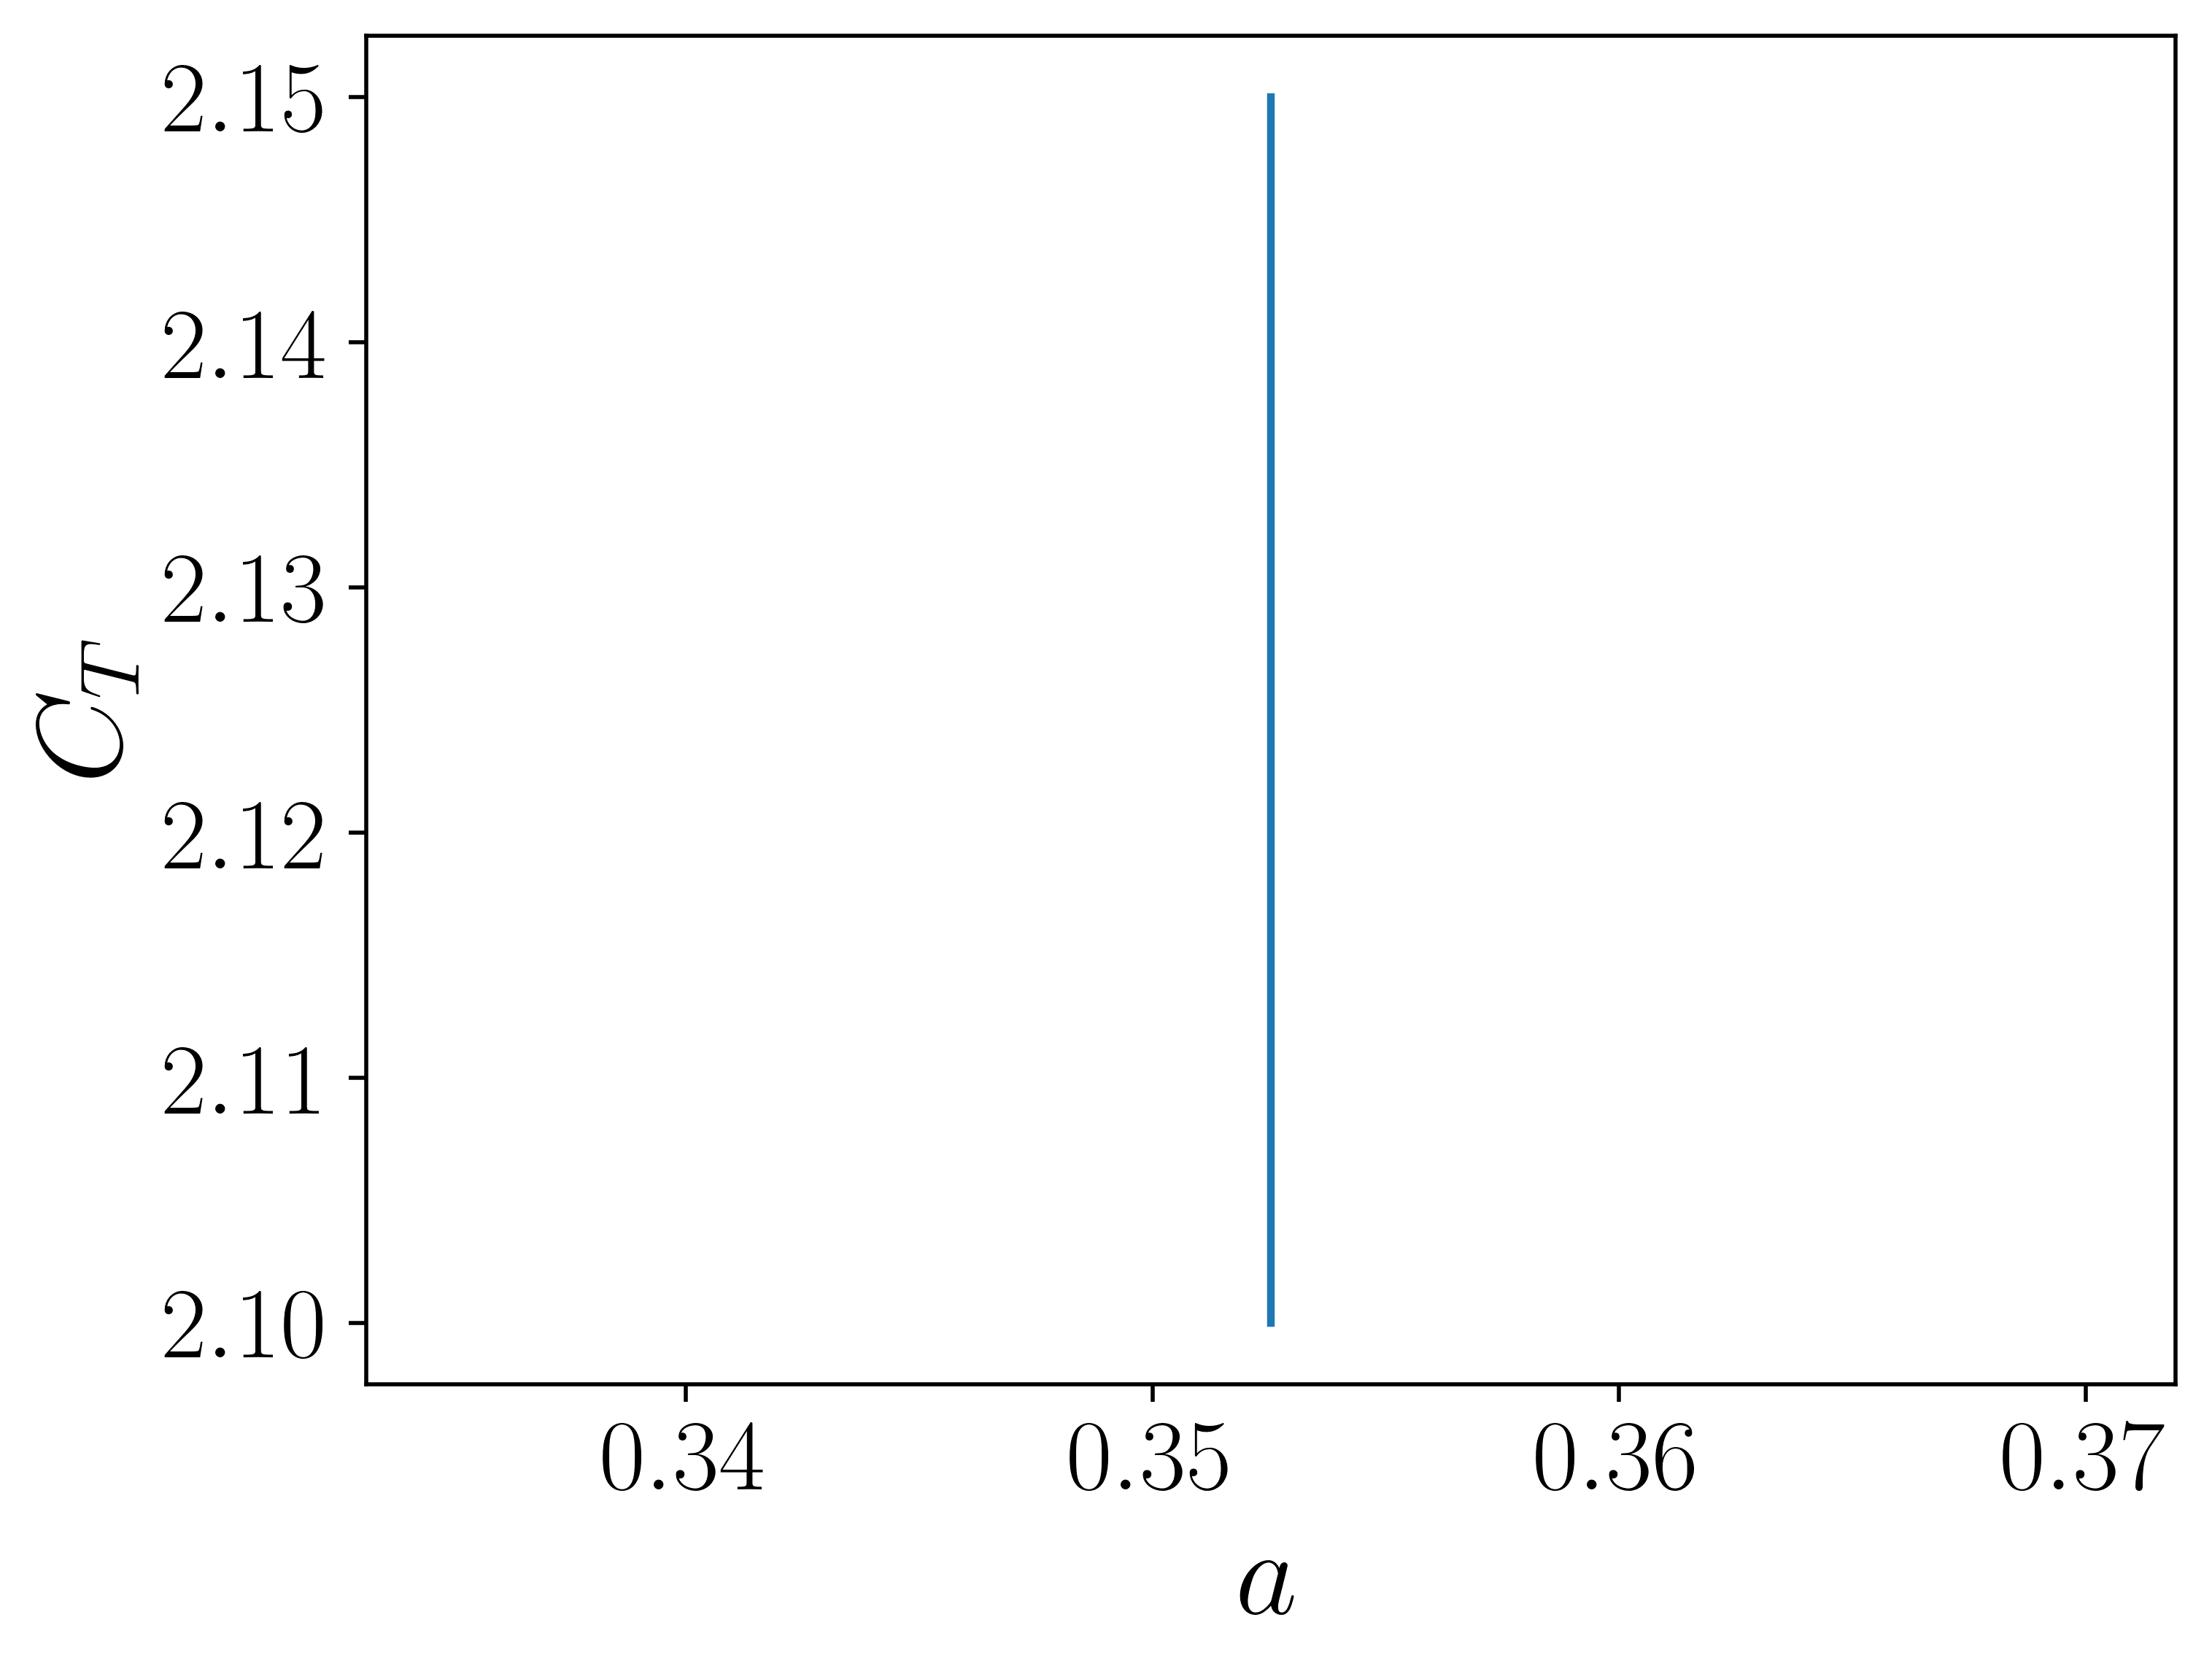

In [72]:
plt.plot(results, CT)

plt.ylabel('$C_T$', fontsize=fontsize)
plt.xlabel('$a$', fontsize=fontsize)

In [71]:
results

array([0.35253748, 0.35253748, 0.35253748, 0.35253748, 0.35253748,
       0.35253748, 0.35253748, 0.35253748, 0.35253748, 0.35253748,
       0.35253748, 0.35253748, 0.35253748, 0.35253748, 0.35253748,
       0.35253748, 0.35253748, 0.35253748, 0.35253748, 0.35253748,
       0.35253748, 0.35253748, 0.35253748, 0.35253748, 0.35253748,
       0.35253748, 0.35253748, 0.35253748, 0.35253748, 0.35253748,
       0.35253748, 0.35253748, 0.35253748, 0.35253748, 0.35253748,
       0.35253748, 0.35253748, 0.35253748, 0.35253748, 0.35253748,
       0.35253748, 0.35253748, 0.35253748, 0.35253748, 0.35253748,
       0.35253748, 0.35253748, 0.35253748, 0.35253748, 0.35253748,
       0.35253748, 0.35253748, 0.35253748, 0.35253748, 0.35253748,
       0.35253748, 0.35253748, 0.35253748, 0.35253748, 0.35253748,
       0.35253748, 0.35253748, 0.35253748, 0.35253748, 0.35253748,
       0.35253748, 0.35253748, 0.35253748, 0.35253748, 0.35253748,
       0.35253748, 0.35253748, 0.35253748, 0.35253748, 0.35253

In [31]:
scalars['scaler_cot_rotor'].mean_

array([0.89344316])

In [32]:
scalars['scaler_cotp_rotor'].mean_

array([2.0614034])